In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 

In [2]:
import Net
import reduceClasses
import binaryRatio
import train_with_dir
import test 
import get_confidence_interval

In [3]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))

In [5]:
reduced_train_mnist = reduceClasses.reduce(train_mnist, NUM_CLASSES_REDUCED)
reduced_test_mnist = reduceClasses.reduce(test_mnist, NUM_CLASSES_REDUCED)


reduced_train_mnist_ratio = binaryRatio.ratio(train_mnist, 2, ratio) 

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [6]:
print(np.unique(np.array(reduced_train_mnist.labels), return_counts=True))

print(np.unique(np.array(reduced_train_mnist_ratio.labels), return_counts=True))

print(np.unique(np.array(train_mnist.train_labels), return_counts=True))

(array([0, 1]), array([5923, 6742]))
(array([0, 1]), array([5923,   59]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [7]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)

In [19]:
# normal, 10 classes
for i in range(10):
    network = Net.Net(NUM_CLASSES)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_normal, network, optimizer, f'results2/normal{i}/model{epoch}')
        _, _, _ = test.test(test_loader_normal, network)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.318897
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.292877
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.235545
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.257602
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.277894
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.222409
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.184230
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.176389
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.164033
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.119530
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.097539
Train Epoch: 0 [7040/60000 (12%)]	Loss: 1.978801
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.792913
Train Epoch: 0 [8320/60000 (14%)]	Loss: 1.823588
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.526228
Train Epoch: 0 [9600/60000 (16%)]	Loss: 1.518525
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.437462
Train Epoch: 0 [10880/60000 (18%)]	Loss: 1.396329
Train Epoch: 0 [11520/60000 (19%)]	Loss: 1.687824
Train Epoch: 0 [12160/60000 (20%)]	Loss: 1.268442
Train Epoch: 0 [12800/60000 (

Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.542940
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.365547
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.229214
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.327967
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.412452
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.278530
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.184611
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.396876
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.308651
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.611935
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.353975
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.170397
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.250171
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.253137
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.236451
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.354729
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.313236
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.319860
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.322791
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.401965


Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.091784
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.270865
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.310390
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.236039
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.325638
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.190776
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.205130
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.278818
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.189290
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.372380
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.447795
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.334316
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.246387
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.319669
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.281063
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.099687
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.245992
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.223288
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.288560
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.252739


Train Epoch: 5 [14080/60000 (23%)]	Loss: 0.083690
Train Epoch: 5 [14720/60000 (25%)]	Loss: 0.369868
Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.077770
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.345291
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.407982
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.047968
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.132173
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.097169
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.358771
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.168335
Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.091398
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.195722
Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.103522
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.160098
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.170980
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.254097
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.107628
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.188115
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.119568
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.214206


Train Epoch: 6 [58880/60000 (98%)]	Loss: 0.040947
Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.050873

Test set: Avg. loss: 0.0001, Accuracy: 9804/10000 (98%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.128861
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.115491
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.215767
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.379783
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.119294
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.254574
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.182176
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.127914
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.508419
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.253403
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.155018
Train Epoch: 7 [7040/60000 (12%)]	Loss: 0.102746
Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.178763
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.082541
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.212705
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.260705
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.488528
Train Epoch: 7 [10880

Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.264010
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.184381
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.237876
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.285773
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.294181
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.250430
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.237062
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.125586
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.108051
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.140439
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.085109
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.239127
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.186684
Train Epoch: 8 [51840/60000 (86%)]	Loss: 0.143010
Train Epoch: 8 [52480/60000 (87%)]	Loss: 0.059828
Train Epoch: 8 [53120/60000 (88%)]	Loss: 0.177650
Train Epoch: 8 [53760/60000 (90%)]	Loss: 0.126254
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.067283
Train Epoch: 8 [55040/60000 (92%)]	Loss: 0.118663
Train Epoch: 8 [55680/60000 (93%)]	Loss: 0.186837


Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.170880
Train Epoch: 10 [27520/60000 (46%)]	Loss: 0.221943
Train Epoch: 10 [28160/60000 (47%)]	Loss: 0.221418
Train Epoch: 10 [28800/60000 (48%)]	Loss: 0.195721
Train Epoch: 10 [29440/60000 (49%)]	Loss: 0.130710
Train Epoch: 10 [30080/60000 (50%)]	Loss: 0.193826
Train Epoch: 10 [30720/60000 (51%)]	Loss: 0.164309
Train Epoch: 10 [31360/60000 (52%)]	Loss: 0.162427
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.182506
Train Epoch: 10 [32640/60000 (54%)]	Loss: 0.145623
Train Epoch: 10 [33280/60000 (55%)]	Loss: 0.153197
Train Epoch: 10 [33920/60000 (57%)]	Loss: 0.095687
Train Epoch: 10 [34560/60000 (58%)]	Loss: 0.175947
Train Epoch: 10 [35200/60000 (59%)]	Loss: 0.206332
Train Epoch: 10 [35840/60000 (60%)]	Loss: 0.265192
Train Epoch: 10 [36480/60000 (61%)]	Loss: 0.093218
Train Epoch: 10 [37120/60000 (62%)]	Loss: 0.191223
Train Epoch: 10 [37760/60000 (63%)]	Loss: 0.183048
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.179416
Train Epoch: 10 [39040/60000 (6

Train Epoch: 12 [8960/60000 (15%)]	Loss: 0.232726
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.262613
Train Epoch: 12 [10240/60000 (17%)]	Loss: 0.454334
Train Epoch: 12 [10880/60000 (18%)]	Loss: 0.089657
Train Epoch: 12 [11520/60000 (19%)]	Loss: 0.205165
Train Epoch: 12 [12160/60000 (20%)]	Loss: 0.302713
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.111420
Train Epoch: 12 [13440/60000 (22%)]	Loss: 0.040547
Train Epoch: 12 [14080/60000 (23%)]	Loss: 0.106386
Train Epoch: 12 [14720/60000 (25%)]	Loss: 0.238029
Train Epoch: 12 [15360/60000 (26%)]	Loss: 0.043180
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.196837
Train Epoch: 12 [16640/60000 (28%)]	Loss: 0.335383
Train Epoch: 12 [17280/60000 (29%)]	Loss: 0.067289
Train Epoch: 12 [17920/60000 (30%)]	Loss: 0.040419
Train Epoch: 12 [18560/60000 (31%)]	Loss: 0.163407
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.081069
Train Epoch: 12 [19840/60000 (33%)]	Loss: 0.261260
Train Epoch: 12 [20480/60000 (34%)]	Loss: 0.056000
Train Epoch: 12 [21120/60000 (35%

Train Epoch: 13 [51840/60000 (86%)]	Loss: 0.050153
Train Epoch: 13 [52480/60000 (87%)]	Loss: 0.090297
Train Epoch: 13 [53120/60000 (88%)]	Loss: 0.107107
Train Epoch: 13 [53760/60000 (90%)]	Loss: 0.131018
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.067814
Train Epoch: 13 [55040/60000 (92%)]	Loss: 0.097371
Train Epoch: 13 [55680/60000 (93%)]	Loss: 0.229605
Train Epoch: 13 [56320/60000 (94%)]	Loss: 0.194228
Train Epoch: 13 [56960/60000 (95%)]	Loss: 0.049819
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.363314
Train Epoch: 13 [58240/60000 (97%)]	Loss: 0.059239
Train Epoch: 13 [58880/60000 (98%)]	Loss: 0.043038
Train Epoch: 13 [59520/60000 (99%)]	Loss: 0.019693

Test set: Avg. loss: 0.0000, Accuracy: 9858/10000 (99%)

Train Epoch: 14 [0/60000 (0%)]	Loss: 0.175180
Train Epoch: 14 [640/60000 (1%)]	Loss: 0.043401
Train Epoch: 14 [1280/60000 (2%)]	Loss: 0.244816
Train Epoch: 14 [1920/60000 (3%)]	Loss: 0.274998
Train Epoch: 14 [2560/60000 (4%)]	Loss: 0.109298
Train Epoch: 14 [3200/60000 (5%)]	Loss

Train Epoch: 15 [34560/60000 (58%)]	Loss: 0.092335
Train Epoch: 15 [35200/60000 (59%)]	Loss: 0.225513
Train Epoch: 15 [35840/60000 (60%)]	Loss: 0.187990
Train Epoch: 15 [36480/60000 (61%)]	Loss: 0.260424
Train Epoch: 15 [37120/60000 (62%)]	Loss: 0.113434
Train Epoch: 15 [37760/60000 (63%)]	Loss: 0.058518
Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.114681
Train Epoch: 15 [39040/60000 (65%)]	Loss: 0.093666
Train Epoch: 15 [39680/60000 (66%)]	Loss: 0.111569
Train Epoch: 15 [40320/60000 (67%)]	Loss: 0.034837
Train Epoch: 15 [40960/60000 (68%)]	Loss: 0.077165
Train Epoch: 15 [41600/60000 (69%)]	Loss: 0.095821
Train Epoch: 15 [42240/60000 (70%)]	Loss: 0.112752
Train Epoch: 15 [42880/60000 (71%)]	Loss: 0.195972
Train Epoch: 15 [43520/60000 (72%)]	Loss: 0.271697
Train Epoch: 15 [44160/60000 (74%)]	Loss: 0.071527
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.164426
Train Epoch: 15 [45440/60000 (76%)]	Loss: 0.208369
Train Epoch: 15 [46080/60000 (77%)]	Loss: 0.108024
Train Epoch: 15 [46720/60000 (7

Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.220763
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.057404
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.031923
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.164995
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.160113
Train Epoch: 17 [19840/60000 (33%)]	Loss: 0.157446
Train Epoch: 17 [20480/60000 (34%)]	Loss: 0.040930
Train Epoch: 17 [21120/60000 (35%)]	Loss: 0.106805
Train Epoch: 17 [21760/60000 (36%)]	Loss: 0.102279
Train Epoch: 17 [22400/60000 (37%)]	Loss: 0.071566
Train Epoch: 17 [23040/60000 (38%)]	Loss: 0.123981
Train Epoch: 17 [23680/60000 (39%)]	Loss: 0.187521
Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.023800
Train Epoch: 17 [24960/60000 (42%)]	Loss: 0.047564
Train Epoch: 17 [25600/60000 (43%)]	Loss: 0.155717
Train Epoch: 17 [26240/60000 (44%)]	Loss: 0.116049
Train Epoch: 17 [26880/60000 (45%)]	Loss: 0.158512
Train Epoch: 17 [27520/60000 (46%)]	Loss: 0.190363
Train Epoch: 17 [28160/60000 (47%)]	Loss: 0.237384
Train Epoch: 17 [28800/60000 (4


Test set: Avg. loss: 0.0000, Accuracy: 9868/10000 (99%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 0.100130
Train Epoch: 19 [640/60000 (1%)]	Loss: 0.100394
Train Epoch: 19 [1280/60000 (2%)]	Loss: 0.146292
Train Epoch: 19 [1920/60000 (3%)]	Loss: 0.054870
Train Epoch: 19 [2560/60000 (4%)]	Loss: 0.110243
Train Epoch: 19 [3200/60000 (5%)]	Loss: 0.052129
Train Epoch: 19 [3840/60000 (6%)]	Loss: 0.079166
Train Epoch: 19 [4480/60000 (7%)]	Loss: 0.102527
Train Epoch: 19 [5120/60000 (9%)]	Loss: 0.240564
Train Epoch: 19 [5760/60000 (10%)]	Loss: 0.239067
Train Epoch: 19 [6400/60000 (11%)]	Loss: 0.114957
Train Epoch: 19 [7040/60000 (12%)]	Loss: 0.145491
Train Epoch: 19 [7680/60000 (13%)]	Loss: 0.066383
Train Epoch: 19 [8320/60000 (14%)]	Loss: 0.198764
Train Epoch: 19 [8960/60000 (15%)]	Loss: 0.082310
Train Epoch: 19 [9600/60000 (16%)]	Loss: 0.168066
Train Epoch: 19 [10240/60000 (17%)]	Loss: 0.399390
Train Epoch: 19 [10880/60000 (18%)]	Loss: 0.094114
Train Epoch: 19 [11520/60000 (19%)]	Loss: 0.173286
Tr

Train Epoch: 0 [43520/60000 (72%)]	Loss: 0.469445
Train Epoch: 0 [44160/60000 (74%)]	Loss: 0.546821
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.403549
Train Epoch: 0 [45440/60000 (76%)]	Loss: 0.824988
Train Epoch: 0 [46080/60000 (77%)]	Loss: 0.525149
Train Epoch: 0 [46720/60000 (78%)]	Loss: 0.539852
Train Epoch: 0 [47360/60000 (79%)]	Loss: 0.512845
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.529539
Train Epoch: 0 [48640/60000 (81%)]	Loss: 0.351913
Train Epoch: 0 [49280/60000 (82%)]	Loss: 0.318518
Train Epoch: 0 [49920/60000 (83%)]	Loss: 0.584867
Train Epoch: 0 [50560/60000 (84%)]	Loss: 0.574695
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.549039
Train Epoch: 0 [51840/60000 (86%)]	Loss: 0.517056
Train Epoch: 0 [52480/60000 (87%)]	Loss: 0.311181
Train Epoch: 0 [53120/60000 (88%)]	Loss: 0.498681
Train Epoch: 0 [53760/60000 (90%)]	Loss: 0.355625
Train Epoch: 0 [54400/60000 (91%)]	Loss: 0.385579
Train Epoch: 0 [55040/60000 (92%)]	Loss: 0.505484
Train Epoch: 0 [55680/60000 (93%)]	Loss: 0.373660


Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.380613
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.247896
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.201023
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.384852
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.307324
Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.291720
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.349955
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.334657
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.304118
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.174540
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.430291
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.375481
Train Epoch: 2 [35840/60000 (60%)]	Loss: 0.368744
Train Epoch: 2 [36480/60000 (61%)]	Loss: 0.351301
Train Epoch: 2 [37120/60000 (62%)]	Loss: 0.260781
Train Epoch: 2 [37760/60000 (63%)]	Loss: 0.225156
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.206036
Train Epoch: 2 [39040/60000 (65%)]	Loss: 0.107577
Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.235396
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.254152


Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.166602
Train Epoch: 4 [13440/60000 (22%)]	Loss: 0.141122
Train Epoch: 4 [14080/60000 (23%)]	Loss: 0.133330
Train Epoch: 4 [14720/60000 (25%)]	Loss: 0.381010
Train Epoch: 4 [15360/60000 (26%)]	Loss: 0.307260
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.341004
Train Epoch: 4 [16640/60000 (28%)]	Loss: 0.305228
Train Epoch: 4 [17280/60000 (29%)]	Loss: 0.162240
Train Epoch: 4 [17920/60000 (30%)]	Loss: 0.170896
Train Epoch: 4 [18560/60000 (31%)]	Loss: 0.343107
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.346651
Train Epoch: 4 [19840/60000 (33%)]	Loss: 0.171079
Train Epoch: 4 [20480/60000 (34%)]	Loss: 0.165860
Train Epoch: 4 [21120/60000 (35%)]	Loss: 0.233398
Train Epoch: 4 [21760/60000 (36%)]	Loss: 0.105467
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.178854
Train Epoch: 4 [23040/60000 (38%)]	Loss: 0.363917
Train Epoch: 4 [23680/60000 (39%)]	Loss: 0.315280
Train Epoch: 4 [24320/60000 (41%)]	Loss: 0.195005
Train Epoch: 4 [24960/60000 (42%)]	Loss: 0.192034


Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.162343
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.134826
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.041947
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.176001

Test set: Avg. loss: 0.0001, Accuracy: 9794/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.127423
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.189922
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.215100
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.224000
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.183877
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.134838
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.100116
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.187764
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.161123
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.332331
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.213880
Train Epoch: 6 [7040/60000 (12%)]	Loss: 0.300693
Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.223689
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.173267
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.118393
Train Epoch: 6 [9600

Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.168859
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.109665
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.238295
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.095229
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.262717
Train Epoch: 7 [45440/60000 (76%)]	Loss: 0.423191
Train Epoch: 7 [46080/60000 (77%)]	Loss: 0.260962
Train Epoch: 7 [46720/60000 (78%)]	Loss: 0.121082
Train Epoch: 7 [47360/60000 (79%)]	Loss: 0.223608
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.142108
Train Epoch: 7 [48640/60000 (81%)]	Loss: 0.267559
Train Epoch: 7 [49280/60000 (82%)]	Loss: 0.060771
Train Epoch: 7 [49920/60000 (83%)]	Loss: 0.244961
Train Epoch: 7 [50560/60000 (84%)]	Loss: 0.196756
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.413702
Train Epoch: 7 [51840/60000 (86%)]	Loss: 0.132962
Train Epoch: 7 [52480/60000 (87%)]	Loss: 0.079096
Train Epoch: 7 [53120/60000 (88%)]	Loss: 0.165499
Train Epoch: 7 [53760/60000 (90%)]	Loss: 0.126244
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.083435


Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.202221
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.358546
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.151015
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.119029
Train Epoch: 9 [29440/60000 (49%)]	Loss: 0.171002
Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.188571
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.171051
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.140105
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.115421
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.199779
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.097822
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.049091
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.132250
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.214552
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.357555
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.158484
Train Epoch: 9 [37120/60000 (62%)]	Loss: 0.211312
Train Epoch: 9 [37760/60000 (63%)]	Loss: 0.219822
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.111640
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.068722


Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.474442
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.183098
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.294894
Train Epoch: 11 [12160/60000 (20%)]	Loss: 0.155499
Train Epoch: 11 [12800/60000 (21%)]	Loss: 0.225305
Train Epoch: 11 [13440/60000 (22%)]	Loss: 0.070710
Train Epoch: 11 [14080/60000 (23%)]	Loss: 0.057155
Train Epoch: 11 [14720/60000 (25%)]	Loss: 0.364061
Train Epoch: 11 [15360/60000 (26%)]	Loss: 0.207158
Train Epoch: 11 [16000/60000 (27%)]	Loss: 0.235432
Train Epoch: 11 [16640/60000 (28%)]	Loss: 0.192588
Train Epoch: 11 [17280/60000 (29%)]	Loss: 0.086816
Train Epoch: 11 [17920/60000 (30%)]	Loss: 0.125973
Train Epoch: 11 [18560/60000 (31%)]	Loss: 0.188107
Train Epoch: 11 [19200/60000 (32%)]	Loss: 0.298317
Train Epoch: 11 [19840/60000 (33%)]	Loss: 0.108046
Train Epoch: 11 [20480/60000 (34%)]	Loss: 0.057144
Train Epoch: 11 [21120/60000 (35%)]	Loss: 0.059284
Train Epoch: 11 [21760/60000 (36%)]	Loss: 0.116702
Train Epoch: 11 [22400/60000 (3

Train Epoch: 12 [53120/60000 (88%)]	Loss: 0.153753
Train Epoch: 12 [53760/60000 (90%)]	Loss: 0.059398
Train Epoch: 12 [54400/60000 (91%)]	Loss: 0.030235
Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.080703
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.254362
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.255571
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.209664
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.268595
Train Epoch: 12 [58240/60000 (97%)]	Loss: 0.031533
Train Epoch: 12 [58880/60000 (98%)]	Loss: 0.090666
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.032871

Test set: Avg. loss: 0.0000, Accuracy: 9843/10000 (98%)

Train Epoch: 13 [0/60000 (0%)]	Loss: 0.220454
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.059498
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.091471
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.141698
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.155228
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.077326
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.044694
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.

Train Epoch: 14 [35840/60000 (60%)]	Loss: 0.404987
Train Epoch: 14 [36480/60000 (61%)]	Loss: 0.057435
Train Epoch: 14 [37120/60000 (62%)]	Loss: 0.104777
Train Epoch: 14 [37760/60000 (63%)]	Loss: 0.107659
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.189403
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.063458
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.107162
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.082263
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.196353
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.100475
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.136848
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.160894
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.196506
Train Epoch: 14 [44160/60000 (74%)]	Loss: 0.085937
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.101365
Train Epoch: 14 [45440/60000 (76%)]	Loss: 0.150469
Train Epoch: 14 [46080/60000 (77%)]	Loss: 0.182223
Train Epoch: 14 [46720/60000 (78%)]	Loss: 0.262392
Train Epoch: 14 [47360/60000 (79%)]	Loss: 0.251358
Train Epoch: 14 [48000/60000 (8

Train Epoch: 16 [17920/60000 (30%)]	Loss: 0.088635
Train Epoch: 16 [18560/60000 (31%)]	Loss: 0.082871
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.345150
Train Epoch: 16 [19840/60000 (33%)]	Loss: 0.128195
Train Epoch: 16 [20480/60000 (34%)]	Loss: 0.080028
Train Epoch: 16 [21120/60000 (35%)]	Loss: 0.132539
Train Epoch: 16 [21760/60000 (36%)]	Loss: 0.131620
Train Epoch: 16 [22400/60000 (37%)]	Loss: 0.049946
Train Epoch: 16 [23040/60000 (38%)]	Loss: 0.206403
Train Epoch: 16 [23680/60000 (39%)]	Loss: 0.291767
Train Epoch: 16 [24320/60000 (41%)]	Loss: 0.043710
Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.105576
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.140190
Train Epoch: 16 [26240/60000 (44%)]	Loss: 0.063533
Train Epoch: 16 [26880/60000 (45%)]	Loss: 0.142820
Train Epoch: 16 [27520/60000 (46%)]	Loss: 0.243101
Train Epoch: 16 [28160/60000 (47%)]	Loss: 0.144457
Train Epoch: 16 [28800/60000 (48%)]	Loss: 0.064550
Train Epoch: 16 [29440/60000 (49%)]	Loss: 0.136941
Train Epoch: 16 [30080/60000 (5

Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.126295
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.107828
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.138746
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.061626
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.065430
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.100250
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.154516
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.109094
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.194446
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.095653
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.105254
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.105700
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.087580
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.148712
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.412192
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.113035
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.158978
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.046369
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.068154
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.080298
T

Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.138727
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.096675
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.129805
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.184965
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.087346
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.124947
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.098727
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.057755
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.184778
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.174480
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.360002
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.050520
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.027509
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.181992
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.084270
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.062591
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.085557
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.244369
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.140726
Train Epoch: 19 [56960/60000 (9

Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.366838
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.349912
Train Epoch: 1 [30080/60000 (50%)]	Loss: 0.496843
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.402237
Train Epoch: 1 [31360/60000 (52%)]	Loss: 0.487012
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.315584
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.344447
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.248307
Train Epoch: 1 [33920/60000 (57%)]	Loss: 0.218256
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.482526
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.576184
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.315243
Train Epoch: 1 [36480/60000 (61%)]	Loss: 0.258422
Train Epoch: 1 [37120/60000 (62%)]	Loss: 0.339614
Train Epoch: 1 [37760/60000 (63%)]	Loss: 0.343647
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.269644
Train Epoch: 1 [39040/60000 (65%)]	Loss: 0.096631
Train Epoch: 1 [39680/60000 (66%)]	Loss: 0.348031
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.251413
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.444212


Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.235067
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.211562
Train Epoch: 3 [14080/60000 (23%)]	Loss: 0.162165
Train Epoch: 3 [14720/60000 (25%)]	Loss: 0.709710
Train Epoch: 3 [15360/60000 (26%)]	Loss: 0.246794
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.343120
Train Epoch: 3 [16640/60000 (28%)]	Loss: 0.457538
Train Epoch: 3 [17280/60000 (29%)]	Loss: 0.143321
Train Epoch: 3 [17920/60000 (30%)]	Loss: 0.238691
Train Epoch: 3 [18560/60000 (31%)]	Loss: 0.116749
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.184579
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.214247
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.126353
Train Epoch: 3 [21120/60000 (35%)]	Loss: 0.248482
Train Epoch: 3 [21760/60000 (36%)]	Loss: 0.098844
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.243265
Train Epoch: 3 [23040/60000 (38%)]	Loss: 0.119058
Train Epoch: 3 [23680/60000 (39%)]	Loss: 0.295297
Train Epoch: 3 [24320/60000 (41%)]	Loss: 0.049580
Train Epoch: 3 [24960/60000 (42%)]	Loss: 0.118817


Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.305905
Train Epoch: 4 [58240/60000 (97%)]	Loss: 0.053997
Train Epoch: 4 [58880/60000 (98%)]	Loss: 0.044437
Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.060750

Test set: Avg. loss: 0.0001, Accuracy: 9783/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.160318
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.061379
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.142228
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.188515
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.245192
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.157500
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.243098
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.308901
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.188151
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.355496
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.368154
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.171204
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.116242
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.122216
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.237362
Train Epoch: 5 [9600

Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.165641
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.168170
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.198504
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.239859
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.118707
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.352446
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.350394
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.203917
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.226448
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.445144
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.239886
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.099125
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.047520
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.108932
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.135463
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.361786
Train Epoch: 6 [51840/60000 (86%)]	Loss: 0.159847
Train Epoch: 6 [52480/60000 (87%)]	Loss: 0.027670
Train Epoch: 6 [53120/60000 (88%)]	Loss: 0.275115
Train Epoch: 6 [53760/60000 (90%)]	Loss: 0.144482


Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.243349
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.281682
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.361677
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.211305
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.235799
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.224287
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.171196
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.156842
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.237527
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.103791
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.236585
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.065939
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.117780
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.166296
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.042083
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.305488
Train Epoch: 8 [35840/60000 (60%)]	Loss: 0.230178
Train Epoch: 8 [36480/60000 (61%)]	Loss: 0.157489
Train Epoch: 8 [37120/60000 (62%)]	Loss: 0.158105
Train Epoch: 8 [37760/60000 (63%)]	Loss: 0.242230


Train Epoch: 16 [14080/60000 (23%)]	Loss: 0.060131
Train Epoch: 16 [14720/60000 (25%)]	Loss: 0.262313
Train Epoch: 16 [15360/60000 (26%)]	Loss: 0.116096
Train Epoch: 16 [16000/60000 (27%)]	Loss: 0.207439
Train Epoch: 16 [16640/60000 (28%)]	Loss: 0.292352
Train Epoch: 16 [17280/60000 (29%)]	Loss: 0.073570
Train Epoch: 16 [17920/60000 (30%)]	Loss: 0.078648
Train Epoch: 16 [18560/60000 (31%)]	Loss: 0.140570
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.045087
Train Epoch: 16 [19840/60000 (33%)]	Loss: 0.178761
Train Epoch: 16 [20480/60000 (34%)]	Loss: 0.079291
Train Epoch: 16 [21120/60000 (35%)]	Loss: 0.125983
Train Epoch: 16 [21760/60000 (36%)]	Loss: 0.061964
Train Epoch: 16 [22400/60000 (37%)]	Loss: 0.039361
Train Epoch: 16 [23040/60000 (38%)]	Loss: 0.275185
Train Epoch: 16 [23680/60000 (39%)]	Loss: 0.225236
Train Epoch: 16 [24320/60000 (41%)]	Loss: 0.053058
Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.069065
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.012165
Train Epoch: 16 [26240/60000 (4

Train Epoch: 17 [57600/60000 (96%)]	Loss: 0.315476
Train Epoch: 17 [58240/60000 (97%)]	Loss: 0.056683
Train Epoch: 17 [58880/60000 (98%)]	Loss: 0.022204
Train Epoch: 17 [59520/60000 (99%)]	Loss: 0.017351

Test set: Avg. loss: 0.0000, Accuracy: 9880/10000 (99%)

Train Epoch: 18 [0/60000 (0%)]	Loss: 0.068436
Train Epoch: 18 [640/60000 (1%)]	Loss: 0.153166
Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.126305
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.235921
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.093489
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.082563
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.049342
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.252465
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.181297
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.107164
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.122576
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.266517
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.107853
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.023667
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.133359
T

Train Epoch: 19 [39680/60000 (66%)]	Loss: 0.142873
Train Epoch: 19 [40320/60000 (67%)]	Loss: 0.078503
Train Epoch: 19 [40960/60000 (68%)]	Loss: 0.175227
Train Epoch: 19 [41600/60000 (69%)]	Loss: 0.122666
Train Epoch: 19 [42240/60000 (70%)]	Loss: 0.032798
Train Epoch: 19 [42880/60000 (71%)]	Loss: 0.041389
Train Epoch: 19 [43520/60000 (72%)]	Loss: 0.095775
Train Epoch: 19 [44160/60000 (74%)]	Loss: 0.051578
Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.136429
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.154474
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.043366
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.203135
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.199893
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.198685
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.115471
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.086711
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.101796
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.156184
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.244843
Train Epoch: 19 [51840/60000 (8

Train Epoch: 1 [24320/60000 (41%)]	Loss: 0.135441
Train Epoch: 1 [24960/60000 (42%)]	Loss: 0.357728
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.343369
Train Epoch: 1 [26240/60000 (44%)]	Loss: 0.317198
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.382230
Train Epoch: 1 [27520/60000 (46%)]	Loss: 0.249868
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.526189
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.337998
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.373876
Train Epoch: 1 [30080/60000 (50%)]	Loss: 0.503768
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.465912
Train Epoch: 1 [31360/60000 (52%)]	Loss: 0.443864
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.323344
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.241198
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.241229
Train Epoch: 1 [33920/60000 (57%)]	Loss: 0.300967
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.374886
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.718911
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.414441
Train Epoch: 1 [36480/60000 (61%)]	Loss: 0.524337


Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.288162
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.396160
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.491167
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.231048
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.645921
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.479310
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.301452
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.198130
Train Epoch: 3 [14080/60000 (23%)]	Loss: 0.247028
Train Epoch: 3 [14720/60000 (25%)]	Loss: 0.638727
Train Epoch: 3 [15360/60000 (26%)]	Loss: 0.358384
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.227069
Train Epoch: 3 [16640/60000 (28%)]	Loss: 0.347019
Train Epoch: 3 [17280/60000 (29%)]	Loss: 0.154339
Train Epoch: 3 [17920/60000 (30%)]	Loss: 0.256232
Train Epoch: 3 [18560/60000 (31%)]	Loss: 0.188564
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.198925
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.193205
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.150085
Train Epoch: 3 [21120/60000 (35%)]	Loss: 0.227575
Tr

Train Epoch: 4 [53760/60000 (90%)]	Loss: 0.172244
Train Epoch: 4 [54400/60000 (91%)]	Loss: 0.135375
Train Epoch: 4 [55040/60000 (92%)]	Loss: 0.252108
Train Epoch: 4 [55680/60000 (93%)]	Loss: 0.172221
Train Epoch: 4 [56320/60000 (94%)]	Loss: 0.182806
Train Epoch: 4 [56960/60000 (95%)]	Loss: 0.111844
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.290616
Train Epoch: 4 [58240/60000 (97%)]	Loss: 0.079637
Train Epoch: 4 [58880/60000 (98%)]	Loss: 0.107818
Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.038582

Test set: Avg. loss: 0.0001, Accuracy: 9754/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.139890
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.189940
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.330756
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.211241
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.305396
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.184500
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.236767
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.119256
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.291624
Train Epoch: 5

Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.186201
Train Epoch: 6 [39040/60000 (65%)]	Loss: 0.090555
Train Epoch: 6 [39680/60000 (66%)]	Loss: 0.154172
Train Epoch: 6 [40320/60000 (67%)]	Loss: 0.170589
Train Epoch: 6 [40960/60000 (68%)]	Loss: 0.310917
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.106423
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.145601
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.195653
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.240228
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.185767
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.338827
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.286265
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.155621
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.239719
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.196293
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.114742
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.168959
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.097441
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.132051
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.138945


Train Epoch: 8 [23040/60000 (38%)]	Loss: 0.193378
Train Epoch: 8 [23680/60000 (39%)]	Loss: 0.339039
Train Epoch: 8 [24320/60000 (41%)]	Loss: 0.080573
Train Epoch: 8 [24960/60000 (42%)]	Loss: 0.132025
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.147805
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.118555
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.114298
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.151063
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.242427
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.187721
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.131165
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.206492
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.272660
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.244576
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.121443
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.140402
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.129171
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.062435
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.103172
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.290925


Train Epoch: 10 [7680/60000 (13%)]	Loss: 0.189406
Train Epoch: 10 [8320/60000 (14%)]	Loss: 0.154842
Train Epoch: 10 [8960/60000 (15%)]	Loss: 0.109576
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.171785
Train Epoch: 10 [10240/60000 (17%)]	Loss: 0.412527
Train Epoch: 10 [10880/60000 (18%)]	Loss: 0.080020
Train Epoch: 10 [11520/60000 (19%)]	Loss: 0.313967
Train Epoch: 10 [12160/60000 (20%)]	Loss: 0.219839
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.210258
Train Epoch: 10 [13440/60000 (22%)]	Loss: 0.129010
Train Epoch: 10 [14080/60000 (23%)]	Loss: 0.075340
Train Epoch: 10 [14720/60000 (25%)]	Loss: 0.239824
Train Epoch: 10 [15360/60000 (26%)]	Loss: 0.177400
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.219110
Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.200802
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.196051
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.118413
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.144152
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.239705
Train Epoch: 10 [19840/60000 (33%)]

Train Epoch: 18 [50560/60000 (84%)]	Loss: 0.085117
Train Epoch: 18 [51200/60000 (85%)]	Loss: 0.119841
Train Epoch: 18 [51840/60000 (86%)]	Loss: 0.082287
Train Epoch: 18 [52480/60000 (87%)]	Loss: 0.075899
Train Epoch: 18 [53120/60000 (88%)]	Loss: 0.203334
Train Epoch: 18 [53760/60000 (90%)]	Loss: 0.081294
Train Epoch: 18 [54400/60000 (91%)]	Loss: 0.064397
Train Epoch: 18 [55040/60000 (92%)]	Loss: 0.052665
Train Epoch: 18 [55680/60000 (93%)]	Loss: 0.127710
Train Epoch: 18 [56320/60000 (94%)]	Loss: 0.100505
Train Epoch: 18 [56960/60000 (95%)]	Loss: 0.081689
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.105562
Train Epoch: 18 [58240/60000 (97%)]	Loss: 0.054499
Train Epoch: 18 [58880/60000 (98%)]	Loss: 0.034760
Train Epoch: 18 [59520/60000 (99%)]	Loss: 0.037928

Test set: Avg. loss: 0.0000, Accuracy: 9882/10000 (99%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 0.077566
Train Epoch: 19 [640/60000 (1%)]	Loss: 0.071384
Train Epoch: 19 [1280/60000 (2%)]	Loss: 0.143669
Train Epoch: 19 [1920/60000 (3%)]	

Train Epoch: 0 [33280/60000 (55%)]	Loss: 0.807470
Train Epoch: 0 [33920/60000 (57%)]	Loss: 0.483536
Train Epoch: 0 [34560/60000 (58%)]	Loss: 0.592571
Train Epoch: 0 [35200/60000 (59%)]	Loss: 0.645225
Train Epoch: 0 [35840/60000 (60%)]	Loss: 0.504251
Train Epoch: 0 [36480/60000 (61%)]	Loss: 0.537966
Train Epoch: 0 [37120/60000 (62%)]	Loss: 1.004553
Train Epoch: 0 [37760/60000 (63%)]	Loss: 0.546868
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.498602
Train Epoch: 0 [39040/60000 (65%)]	Loss: 0.386490
Train Epoch: 0 [39680/60000 (66%)]	Loss: 0.692646
Train Epoch: 0 [40320/60000 (67%)]	Loss: 0.355097
Train Epoch: 0 [40960/60000 (68%)]	Loss: 0.666997
Train Epoch: 0 [41600/60000 (69%)]	Loss: 0.364934
Train Epoch: 0 [42240/60000 (70%)]	Loss: 0.509442
Train Epoch: 0 [42880/60000 (71%)]	Loss: 0.910884
Train Epoch: 0 [43520/60000 (72%)]	Loss: 0.621647
Train Epoch: 0 [44160/60000 (74%)]	Loss: 0.515751
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.606263
Train Epoch: 0 [45440/60000 (76%)]	Loss: 0.775109


Train Epoch: 2 [17920/60000 (30%)]	Loss: 0.238329
Train Epoch: 2 [18560/60000 (31%)]	Loss: 0.282008
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.354671
Train Epoch: 2 [19840/60000 (33%)]	Loss: 0.254070
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.236348
Train Epoch: 2 [21120/60000 (35%)]	Loss: 0.273464
Train Epoch: 2 [21760/60000 (36%)]	Loss: 0.269246
Train Epoch: 2 [22400/60000 (37%)]	Loss: 0.282039
Train Epoch: 2 [23040/60000 (38%)]	Loss: 0.360047
Train Epoch: 2 [23680/60000 (39%)]	Loss: 0.527706
Train Epoch: 2 [24320/60000 (41%)]	Loss: 0.115640
Train Epoch: 2 [24960/60000 (42%)]	Loss: 0.266213
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.185469
Train Epoch: 2 [26240/60000 (44%)]	Loss: 0.267913
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.424707
Train Epoch: 2 [27520/60000 (46%)]	Loss: 0.356398
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.471426
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.372953
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.216490
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.297995


Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.241433
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.264456
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.222783
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.287103
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.219360
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.116471
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.333409
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.416899
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.177525
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.127915
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.272277
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.439992
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.650595
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.262379
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.281089
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.417644
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.175553
Train Epoch: 4 [13440/60000 (22%)]	Loss: 0.147018
Train Epoch: 4 [14080/60000 (23%)]	Loss: 0.242868
Train Epoch: 4 [14720/60000 (25%)]	Loss: 0.600465
Train Epoch: 4 [1

Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.278665
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.125262
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.154521
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.374036
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.144218
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.125957
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.272840
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.115332
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.072157
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.258290
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.311987
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.122787
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.133520
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.255612
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.187878
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.114055
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.216406
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.130878
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.127416
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.029264


Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.368743
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.189078
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.192401
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.071527
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.070608
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.168043
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.205780
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.203663
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.183676
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.112619
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.152326
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.037932
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.130627
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.110859
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.156037
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.198924
Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.164707
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.248156
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.190250
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.131852


Train Epoch: 9 [16640/60000 (28%)]	Loss: 0.203689
Train Epoch: 9 [17280/60000 (29%)]	Loss: 0.079051
Train Epoch: 9 [17920/60000 (30%)]	Loss: 0.145062
Train Epoch: 9 [18560/60000 (31%)]	Loss: 0.226871
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.312427
Train Epoch: 9 [19840/60000 (33%)]	Loss: 0.132075
Train Epoch: 9 [20480/60000 (34%)]	Loss: 0.069493
Train Epoch: 9 [21120/60000 (35%)]	Loss: 0.255413
Train Epoch: 9 [21760/60000 (36%)]	Loss: 0.130356
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.145364
Train Epoch: 9 [23040/60000 (38%)]	Loss: 0.145816
Train Epoch: 9 [23680/60000 (39%)]	Loss: 0.481674
Train Epoch: 9 [24320/60000 (41%)]	Loss: 0.119940
Train Epoch: 9 [24960/60000 (42%)]	Loss: 0.072197
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.174300
Train Epoch: 9 [26240/60000 (44%)]	Loss: 0.086782
Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.210739
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.383122
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.296601
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.160381



Test set: Avg. loss: 0.0001, Accuracy: 9838/10000 (98%)

Train Epoch: 11 [0/60000 (0%)]	Loss: 0.044662
Train Epoch: 11 [640/60000 (1%)]	Loss: 0.067533
Train Epoch: 11 [1280/60000 (2%)]	Loss: 0.217195
Train Epoch: 11 [1920/60000 (3%)]	Loss: 0.112610
Train Epoch: 11 [2560/60000 (4%)]	Loss: 0.170187
Train Epoch: 11 [3200/60000 (5%)]	Loss: 0.106526
Train Epoch: 11 [3840/60000 (6%)]	Loss: 0.109518
Train Epoch: 11 [4480/60000 (7%)]	Loss: 0.144184
Train Epoch: 11 [5120/60000 (9%)]	Loss: 0.416337
Train Epoch: 11 [5760/60000 (10%)]	Loss: 0.167020
Train Epoch: 11 [6400/60000 (11%)]	Loss: 0.247654
Train Epoch: 11 [7040/60000 (12%)]	Loss: 0.175666
Train Epoch: 11 [7680/60000 (13%)]	Loss: 0.083775
Train Epoch: 11 [8320/60000 (14%)]	Loss: 0.141849
Train Epoch: 11 [8960/60000 (15%)]	Loss: 0.087156
Train Epoch: 11 [9600/60000 (16%)]	Loss: 0.324949
Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.281231
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.119150
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.206520
Tr

Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.088189
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.101401
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.147780
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.071980
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.074144
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.088004
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.164790
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.093397
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.229126
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.092417
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.067236
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.053857
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.090078
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.179151
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.082929
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.229913
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.102751
Train Epoch: 19 [56960/60000 (95%)]	Loss: 0.030951
Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.092600
Train Epoch: 19 [58240/60000 (9

Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.506991
Train Epoch: 1 [31360/60000 (52%)]	Loss: 0.498294
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.219571
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.364334
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.348313
Train Epoch: 1 [33920/60000 (57%)]	Loss: 0.209180
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.422973
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.548062
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.283556
Train Epoch: 1 [36480/60000 (61%)]	Loss: 0.383291
Train Epoch: 1 [37120/60000 (62%)]	Loss: 0.421415
Train Epoch: 1 [37760/60000 (63%)]	Loss: 0.328769
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.353884
Train Epoch: 1 [39040/60000 (65%)]	Loss: 0.207694
Train Epoch: 1 [39680/60000 (66%)]	Loss: 0.282402
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.212229
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.514268
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.336461
Train Epoch: 1 [42240/60000 (70%)]	Loss: 0.242584
Train Epoch: 1 [42880/60000 (71%)]	Loss: 0.369054


Train Epoch: 3 [14720/60000 (25%)]	Loss: 0.346119
Train Epoch: 3 [15360/60000 (26%)]	Loss: 0.278986
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.410756
Train Epoch: 3 [16640/60000 (28%)]	Loss: 0.262013
Train Epoch: 3 [17280/60000 (29%)]	Loss: 0.199965
Train Epoch: 3 [17920/60000 (30%)]	Loss: 0.197987
Train Epoch: 3 [18560/60000 (31%)]	Loss: 0.141921
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.233983
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.286574
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.242177
Train Epoch: 3 [21120/60000 (35%)]	Loss: 0.223923
Train Epoch: 3 [21760/60000 (36%)]	Loss: 0.090825
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.126274
Train Epoch: 3 [23040/60000 (38%)]	Loss: 0.242255
Train Epoch: 3 [23680/60000 (39%)]	Loss: 0.408676
Train Epoch: 3 [24320/60000 (41%)]	Loss: 0.168278
Train Epoch: 3 [24960/60000 (42%)]	Loss: 0.191323
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.176726
Train Epoch: 3 [26240/60000 (44%)]	Loss: 0.351466
Train Epoch: 3 [26880/60000 (45%)]	Loss: 0.341597



Test set: Avg. loss: 0.0001, Accuracy: 9762/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.181288
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.075961
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.154795
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.288238
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.190521
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.176962
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.224843
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.139941
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.331748
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.224461
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.233756
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.259754
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.172409
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.203245
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.168132
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.291704
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.239376
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.217831
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.313671
Train Epoch: 5 [12160

Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.208428
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.331178
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.244555
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.392421
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.127447
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.201594
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.169533
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.068045
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.176208
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.192890
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.200879
Train Epoch: 6 [51840/60000 (86%)]	Loss: 0.055137
Train Epoch: 6 [52480/60000 (87%)]	Loss: 0.086397
Train Epoch: 6 [53120/60000 (88%)]	Loss: 0.177092
Train Epoch: 6 [53760/60000 (90%)]	Loss: 0.199712
Train Epoch: 6 [54400/60000 (91%)]	Loss: 0.113893
Train Epoch: 6 [55040/60000 (92%)]	Loss: 0.151062
Train Epoch: 6 [55680/60000 (93%)]	Loss: 0.257856
Train Epoch: 6 [56320/60000 (94%)]	Loss: 0.233935
Train Epoch: 6 [56960/60000 (95%)]	Loss: 0.117426


Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.077944
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.264561
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.228755
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.230329
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.239191
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.137634
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.177307
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.103411
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.086336
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.176954
Train Epoch: 8 [35840/60000 (60%)]	Loss: 0.277077
Train Epoch: 8 [36480/60000 (61%)]	Loss: 0.161485
Train Epoch: 8 [37120/60000 (62%)]	Loss: 0.170845
Train Epoch: 8 [37760/60000 (63%)]	Loss: 0.251526
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.128064
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.057509
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.177338
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.152262
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.220221
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.138777


Train Epoch: 10 [14080/60000 (23%)]	Loss: 0.125550
Train Epoch: 10 [14720/60000 (25%)]	Loss: 0.291270
Train Epoch: 10 [15360/60000 (26%)]	Loss: 0.154848
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.260069
Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.262279
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.117765
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.079260
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.219646
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.230060
Train Epoch: 10 [19840/60000 (33%)]	Loss: 0.177742
Train Epoch: 10 [20480/60000 (34%)]	Loss: 0.141666
Train Epoch: 10 [21120/60000 (35%)]	Loss: 0.220095
Train Epoch: 10 [21760/60000 (36%)]	Loss: 0.044620
Train Epoch: 10 [22400/60000 (37%)]	Loss: 0.115985
Train Epoch: 10 [23040/60000 (38%)]	Loss: 0.152385
Train Epoch: 10 [23680/60000 (39%)]	Loss: 0.236459
Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.101612
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.207315
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.099952
Train Epoch: 10 [26240/60000 (4

Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.212179
Train Epoch: 11 [58240/60000 (97%)]	Loss: 0.261101
Train Epoch: 11 [58880/60000 (98%)]	Loss: 0.119651
Train Epoch: 11 [59520/60000 (99%)]	Loss: 0.085695

Test set: Avg. loss: 0.0001, Accuracy: 9838/10000 (98%)

Train Epoch: 12 [0/60000 (0%)]	Loss: 0.215580
Train Epoch: 12 [640/60000 (1%)]	Loss: 0.077759
Train Epoch: 12 [1280/60000 (2%)]	Loss: 0.183962
Train Epoch: 12 [1920/60000 (3%)]	Loss: 0.232970
Train Epoch: 12 [2560/60000 (4%)]	Loss: 0.075688
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.265749
Train Epoch: 12 [3840/60000 (6%)]	Loss: 0.118460
Train Epoch: 12 [4480/60000 (7%)]	Loss: 0.101610
Train Epoch: 12 [5120/60000 (9%)]	Loss: 0.384553
Train Epoch: 12 [5760/60000 (10%)]	Loss: 0.155902
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.140125
Train Epoch: 12 [7040/60000 (12%)]	Loss: 0.258212
Train Epoch: 12 [7680/60000 (13%)]	Loss: 0.156166
Train Epoch: 12 [8320/60000 (14%)]	Loss: 0.095028
Train Epoch: 12 [8960/60000 (15%)]	Loss: 0.101887
T

Train Epoch: 13 [39680/60000 (66%)]	Loss: 0.191318
Train Epoch: 13 [40320/60000 (67%)]	Loss: 0.149296
Train Epoch: 13 [40960/60000 (68%)]	Loss: 0.148590
Train Epoch: 13 [41600/60000 (69%)]	Loss: 0.225486
Train Epoch: 13 [42240/60000 (70%)]	Loss: 0.084760
Train Epoch: 13 [42880/60000 (71%)]	Loss: 0.158363
Train Epoch: 13 [43520/60000 (72%)]	Loss: 0.157193
Train Epoch: 13 [44160/60000 (74%)]	Loss: 0.211314
Train Epoch: 13 [44800/60000 (75%)]	Loss: 0.191144
Train Epoch: 13 [45440/60000 (76%)]	Loss: 0.217803
Train Epoch: 13 [46080/60000 (77%)]	Loss: 0.116483
Train Epoch: 13 [46720/60000 (78%)]	Loss: 0.136902
Train Epoch: 13 [47360/60000 (79%)]	Loss: 0.146808
Train Epoch: 13 [48000/60000 (80%)]	Loss: 0.135140
Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.198475
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.083648
Train Epoch: 13 [49920/60000 (83%)]	Loss: 0.123808
Train Epoch: 13 [50560/60000 (84%)]	Loss: 0.159082
Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.276238
Train Epoch: 13 [51840/60000 (8

Train Epoch: 15 [21760/60000 (36%)]	Loss: 0.077043
Train Epoch: 15 [22400/60000 (37%)]	Loss: 0.126763
Train Epoch: 15 [23040/60000 (38%)]	Loss: 0.093186
Train Epoch: 15 [23680/60000 (39%)]	Loss: 0.146392
Train Epoch: 15 [24320/60000 (41%)]	Loss: 0.064299
Train Epoch: 15 [24960/60000 (42%)]	Loss: 0.150173
Train Epoch: 15 [25600/60000 (43%)]	Loss: 0.107450
Train Epoch: 15 [26240/60000 (44%)]	Loss: 0.181987
Train Epoch: 15 [26880/60000 (45%)]	Loss: 0.099662
Train Epoch: 15 [27520/60000 (46%)]	Loss: 0.357493
Train Epoch: 15 [28160/60000 (47%)]	Loss: 0.088108
Train Epoch: 15 [28800/60000 (48%)]	Loss: 0.194511
Train Epoch: 15 [29440/60000 (49%)]	Loss: 0.056056
Train Epoch: 15 [30080/60000 (50%)]	Loss: 0.190860
Train Epoch: 15 [30720/60000 (51%)]	Loss: 0.424390
Train Epoch: 15 [31360/60000 (52%)]	Loss: 0.321180
Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.120955
Train Epoch: 15 [32640/60000 (54%)]	Loss: 0.120843
Train Epoch: 15 [33280/60000 (55%)]	Loss: 0.134787
Train Epoch: 15 [33920/60000 (5

Train Epoch: 17 [3840/60000 (6%)]	Loss: 0.166501
Train Epoch: 17 [4480/60000 (7%)]	Loss: 0.101102
Train Epoch: 17 [5120/60000 (9%)]	Loss: 0.245405
Train Epoch: 17 [5760/60000 (10%)]	Loss: 0.214832
Train Epoch: 17 [6400/60000 (11%)]	Loss: 0.275094
Train Epoch: 17 [7040/60000 (12%)]	Loss: 0.171949
Train Epoch: 17 [7680/60000 (13%)]	Loss: 0.064146
Train Epoch: 17 [8320/60000 (14%)]	Loss: 0.109297
Train Epoch: 17 [8960/60000 (15%)]	Loss: 0.118072
Train Epoch: 17 [9600/60000 (16%)]	Loss: 0.146405
Train Epoch: 17 [10240/60000 (17%)]	Loss: 0.262928
Train Epoch: 17 [10880/60000 (18%)]	Loss: 0.093387
Train Epoch: 17 [11520/60000 (19%)]	Loss: 0.149488
Train Epoch: 17 [12160/60000 (20%)]	Loss: 0.125558
Train Epoch: 17 [12800/60000 (21%)]	Loss: 0.127455
Train Epoch: 17 [13440/60000 (22%)]	Loss: 0.056073
Train Epoch: 17 [14080/60000 (23%)]	Loss: 0.102712
Train Epoch: 17 [14720/60000 (25%)]	Loss: 0.369062
Train Epoch: 17 [15360/60000 (26%)]	Loss: 0.169578
Train Epoch: 17 [16000/60000 (27%)]	Loss: 0.

Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.077426
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.057382

Test set: Avg. loss: 0.0001, Accuracy: 9773/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.173927
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.236266
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.258701
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.302535
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.194106
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.093627
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.192451
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.268178
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.429522
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.177977
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.198420
Train Epoch: 6 [7040/60000 (12%)]	Loss: 0.196825
Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.170762
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.291694
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.177508
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.298642
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.536277
Train Epoch: 6 [10880

Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.267184
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.229105
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.110281
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.195879
Train Epoch: 7 [45440/60000 (76%)]	Loss: 0.351976
Train Epoch: 7 [46080/60000 (77%)]	Loss: 0.193997
Train Epoch: 7 [46720/60000 (78%)]	Loss: 0.134696
Train Epoch: 7 [47360/60000 (79%)]	Loss: 0.303304
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.261903
Train Epoch: 7 [48640/60000 (81%)]	Loss: 0.095584
Train Epoch: 7 [49280/60000 (82%)]	Loss: 0.064394
Train Epoch: 7 [49920/60000 (83%)]	Loss: 0.209390
Train Epoch: 7 [50560/60000 (84%)]	Loss: 0.172716
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.293699
Train Epoch: 7 [51840/60000 (86%)]	Loss: 0.115036
Train Epoch: 7 [52480/60000 (87%)]	Loss: 0.164301
Train Epoch: 7 [53120/60000 (88%)]	Loss: 0.251056
Train Epoch: 7 [53760/60000 (90%)]	Loss: 0.153292
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.042047
Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.116797


Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.354331
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.504134
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.163609
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.221986
Train Epoch: 9 [29440/60000 (49%)]	Loss: 0.110900
Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.282226
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.093672
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.183994
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.125695
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.258757
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.213232
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.096801
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.172319
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.200947
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.238972
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.305933
Train Epoch: 9 [37120/60000 (62%)]	Loss: 0.174086
Train Epoch: 9 [37760/60000 (63%)]	Loss: 0.234543
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.176383
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.083393


Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.321338
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.137356
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.222088
Train Epoch: 11 [12160/60000 (20%)]	Loss: 0.226928
Train Epoch: 11 [12800/60000 (21%)]	Loss: 0.216316
Train Epoch: 11 [13440/60000 (22%)]	Loss: 0.119564
Train Epoch: 11 [14080/60000 (23%)]	Loss: 0.046181
Train Epoch: 11 [14720/60000 (25%)]	Loss: 0.342326
Train Epoch: 11 [15360/60000 (26%)]	Loss: 0.117638
Train Epoch: 11 [16000/60000 (27%)]	Loss: 0.276547
Train Epoch: 11 [16640/60000 (28%)]	Loss: 0.235205
Train Epoch: 11 [17280/60000 (29%)]	Loss: 0.119215
Train Epoch: 11 [17920/60000 (30%)]	Loss: 0.133544
Train Epoch: 11 [18560/60000 (31%)]	Loss: 0.202267
Train Epoch: 11 [19200/60000 (32%)]	Loss: 0.181267
Train Epoch: 11 [19840/60000 (33%)]	Loss: 0.110650
Train Epoch: 11 [20480/60000 (34%)]	Loss: 0.159750
Train Epoch: 11 [21120/60000 (35%)]	Loss: 0.125398
Train Epoch: 11 [21760/60000 (36%)]	Loss: 0.079034
Train Epoch: 11 [22400/60000 (3

Train Epoch: 12 [53760/60000 (90%)]	Loss: 0.214148
Train Epoch: 12 [54400/60000 (91%)]	Loss: 0.080845
Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.106445
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.223162
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.211678
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.112927
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.122547
Train Epoch: 12 [58240/60000 (97%)]	Loss: 0.097580
Train Epoch: 12 [58880/60000 (98%)]	Loss: 0.037229
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.032871

Test set: Avg. loss: 0.0001, Accuracy: 9843/10000 (98%)

Train Epoch: 13 [0/60000 (0%)]	Loss: 0.075988
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.091452
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.102141
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.125299
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.122025
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.163372
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.177284
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.169474
Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.25

Train Epoch: 14 [35840/60000 (60%)]	Loss: 0.155233
Train Epoch: 14 [36480/60000 (61%)]	Loss: 0.177798
Train Epoch: 14 [37120/60000 (62%)]	Loss: 0.202858
Train Epoch: 14 [37760/60000 (63%)]	Loss: 0.076673
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.104515
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.037097
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.098266
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.089852
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.301698
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.117075
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.085379
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.180095
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.406733
Train Epoch: 14 [44160/60000 (74%)]	Loss: 0.078637
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.103872
Train Epoch: 14 [45440/60000 (76%)]	Loss: 0.272929
Train Epoch: 14 [46080/60000 (77%)]	Loss: 0.131966
Train Epoch: 14 [46720/60000 (78%)]	Loss: 0.281404
Train Epoch: 14 [47360/60000 (79%)]	Loss: 0.179961
Train Epoch: 14 [48000/60000 (8

Train Epoch: 16 [17920/60000 (30%)]	Loss: 0.158515
Train Epoch: 16 [18560/60000 (31%)]	Loss: 0.084893
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.189703
Train Epoch: 16 [19840/60000 (33%)]	Loss: 0.108468
Train Epoch: 16 [20480/60000 (34%)]	Loss: 0.090280
Train Epoch: 16 [21120/60000 (35%)]	Loss: 0.128486
Train Epoch: 16 [21760/60000 (36%)]	Loss: 0.041884
Train Epoch: 16 [22400/60000 (37%)]	Loss: 0.048951
Train Epoch: 16 [23040/60000 (38%)]	Loss: 0.126227
Train Epoch: 16 [23680/60000 (39%)]	Loss: 0.309371
Train Epoch: 16 [24320/60000 (41%)]	Loss: 0.015085
Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.087425
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.081839
Train Epoch: 16 [26240/60000 (44%)]	Loss: 0.126820
Train Epoch: 16 [26880/60000 (45%)]	Loss: 0.209960
Train Epoch: 16 [27520/60000 (46%)]	Loss: 0.126628
Train Epoch: 16 [28160/60000 (47%)]	Loss: 0.083973
Train Epoch: 16 [28800/60000 (48%)]	Loss: 0.104092
Train Epoch: 16 [29440/60000 (49%)]	Loss: 0.034887
Train Epoch: 16 [30080/60000 (5

Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.095174
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.123658
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.123601
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.089190
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.040767
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.035241
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.261766
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.116236
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.187061
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.210285
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.098610
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.096800
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.103188
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.203427
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.412218
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.095837
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.337511
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.384058
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.175791
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.119652
T

Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.090315
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.216502
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.084262
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.138189
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.149364
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.070280
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.133345
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.126551
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.209738
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.152440
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.305882
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.075160
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.042745
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.086321
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.115188
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.090423
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.091130
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.198543
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.102988
Train Epoch: 19 [56960/60000 (9

Train Epoch: 8 [17920/60000 (30%)]	Loss: 0.086892
Train Epoch: 8 [18560/60000 (31%)]	Loss: 0.069968
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.252641
Train Epoch: 8 [19840/60000 (33%)]	Loss: 0.193607
Train Epoch: 8 [20480/60000 (34%)]	Loss: 0.092278
Train Epoch: 8 [21120/60000 (35%)]	Loss: 0.109670
Train Epoch: 8 [21760/60000 (36%)]	Loss: 0.059299
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.150632
Train Epoch: 8 [23040/60000 (38%)]	Loss: 0.182979
Train Epoch: 8 [23680/60000 (39%)]	Loss: 0.360219
Train Epoch: 8 [24320/60000 (41%)]	Loss: 0.062666
Train Epoch: 8 [24960/60000 (42%)]	Loss: 0.048609
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.125027
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.241132
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.250545
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.264435
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.289998
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.195096
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.204777
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.222684


Train Epoch: 10 [2560/60000 (4%)]	Loss: 0.174325
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.129390
Train Epoch: 10 [3840/60000 (6%)]	Loss: 0.059942
Train Epoch: 10 [4480/60000 (7%)]	Loss: 0.142440
Train Epoch: 10 [5120/60000 (9%)]	Loss: 0.237207
Train Epoch: 10 [5760/60000 (10%)]	Loss: 0.241414
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.154905
Train Epoch: 10 [7040/60000 (12%)]	Loss: 0.169207
Train Epoch: 10 [7680/60000 (13%)]	Loss: 0.164239
Train Epoch: 10 [8320/60000 (14%)]	Loss: 0.075300
Train Epoch: 10 [8960/60000 (15%)]	Loss: 0.126900
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.197662
Train Epoch: 10 [10240/60000 (17%)]	Loss: 0.307591
Train Epoch: 10 [10880/60000 (18%)]	Loss: 0.068419
Train Epoch: 10 [11520/60000 (19%)]	Loss: 0.329443
Train Epoch: 10 [12160/60000 (20%)]	Loss: 0.261773
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.090461
Train Epoch: 10 [13440/60000 (22%)]	Loss: 0.040469
Train Epoch: 10 [14080/60000 (23%)]	Loss: 0.121402
Train Epoch: 10 [14720/60000 (25%)]	Loss: 0.4034

Train Epoch: 11 [46080/60000 (77%)]	Loss: 0.110086
Train Epoch: 11 [46720/60000 (78%)]	Loss: 0.192452
Train Epoch: 11 [47360/60000 (79%)]	Loss: 0.330261
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.112328
Train Epoch: 11 [48640/60000 (81%)]	Loss: 0.245117
Train Epoch: 11 [49280/60000 (82%)]	Loss: 0.056823
Train Epoch: 11 [49920/60000 (83%)]	Loss: 0.344164
Train Epoch: 11 [50560/60000 (84%)]	Loss: 0.124100
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.434331
Train Epoch: 11 [51840/60000 (86%)]	Loss: 0.080204
Train Epoch: 11 [52480/60000 (87%)]	Loss: 0.017105
Train Epoch: 11 [53120/60000 (88%)]	Loss: 0.068225
Train Epoch: 11 [53760/60000 (90%)]	Loss: 0.058825
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.208115
Train Epoch: 11 [55040/60000 (92%)]	Loss: 0.059326
Train Epoch: 11 [55680/60000 (93%)]	Loss: 0.158089
Train Epoch: 11 [56320/60000 (94%)]	Loss: 0.258045
Train Epoch: 11 [56960/60000 (95%)]	Loss: 0.091434
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.216247
Train Epoch: 11 [58240/60000 (9

Train Epoch: 13 [28160/60000 (47%)]	Loss: 0.164952
Train Epoch: 13 [28800/60000 (48%)]	Loss: 0.198234
Train Epoch: 13 [29440/60000 (49%)]	Loss: 0.115154
Train Epoch: 13 [30080/60000 (50%)]	Loss: 0.167696
Train Epoch: 13 [30720/60000 (51%)]	Loss: 0.138424
Train Epoch: 13 [31360/60000 (52%)]	Loss: 0.111332
Train Epoch: 13 [32000/60000 (53%)]	Loss: 0.117254
Train Epoch: 13 [32640/60000 (54%)]	Loss: 0.132354
Train Epoch: 13 [33280/60000 (55%)]	Loss: 0.204469
Train Epoch: 13 [33920/60000 (57%)]	Loss: 0.064430
Train Epoch: 13 [34560/60000 (58%)]	Loss: 0.179341
Train Epoch: 13 [35200/60000 (59%)]	Loss: 0.164857
Train Epoch: 13 [35840/60000 (60%)]	Loss: 0.118350
Train Epoch: 13 [36480/60000 (61%)]	Loss: 0.026671
Train Epoch: 13 [37120/60000 (62%)]	Loss: 0.097276
Train Epoch: 13 [37760/60000 (63%)]	Loss: 0.165648
Train Epoch: 13 [38400/60000 (64%)]	Loss: 0.176013
Train Epoch: 13 [39040/60000 (65%)]	Loss: 0.017789
Train Epoch: 13 [39680/60000 (66%)]	Loss: 0.157716
Train Epoch: 13 [40320/60000 (6

Train Epoch: 15 [10240/60000 (17%)]	Loss: 0.322878
Train Epoch: 15 [10880/60000 (18%)]	Loss: 0.092083
Train Epoch: 15 [11520/60000 (19%)]	Loss: 0.150352
Train Epoch: 15 [12160/60000 (20%)]	Loss: 0.214844
Train Epoch: 15 [12800/60000 (21%)]	Loss: 0.190039
Train Epoch: 15 [13440/60000 (22%)]	Loss: 0.084886
Train Epoch: 15 [14080/60000 (23%)]	Loss: 0.153935
Train Epoch: 15 [14720/60000 (25%)]	Loss: 0.232598
Train Epoch: 15 [15360/60000 (26%)]	Loss: 0.165825
Train Epoch: 15 [16000/60000 (27%)]	Loss: 0.143707
Train Epoch: 15 [16640/60000 (28%)]	Loss: 0.229783
Train Epoch: 15 [17280/60000 (29%)]	Loss: 0.090952
Train Epoch: 15 [17920/60000 (30%)]	Loss: 0.125635
Train Epoch: 15 [18560/60000 (31%)]	Loss: 0.175481
Train Epoch: 15 [19200/60000 (32%)]	Loss: 0.106260
Train Epoch: 15 [19840/60000 (33%)]	Loss: 0.131698
Train Epoch: 15 [20480/60000 (34%)]	Loss: 0.051196
Train Epoch: 15 [21120/60000 (35%)]	Loss: 0.062128
Train Epoch: 15 [21760/60000 (36%)]	Loss: 0.051241
Train Epoch: 15 [22400/60000 (3

Train Epoch: 16 [53120/60000 (88%)]	Loss: 0.114880
Train Epoch: 16 [53760/60000 (90%)]	Loss: 0.169683
Train Epoch: 16 [54400/60000 (91%)]	Loss: 0.060292
Train Epoch: 16 [55040/60000 (92%)]	Loss: 0.085911
Train Epoch: 16 [55680/60000 (93%)]	Loss: 0.148802
Train Epoch: 16 [56320/60000 (94%)]	Loss: 0.109675
Train Epoch: 16 [56960/60000 (95%)]	Loss: 0.083472
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.111260
Train Epoch: 16 [58240/60000 (97%)]	Loss: 0.154914
Train Epoch: 16 [58880/60000 (98%)]	Loss: 0.063769
Train Epoch: 16 [59520/60000 (99%)]	Loss: 0.038976

Test set: Avg. loss: 0.0000, Accuracy: 9868/10000 (99%)

Train Epoch: 17 [0/60000 (0%)]	Loss: 0.059679
Train Epoch: 17 [640/60000 (1%)]	Loss: 0.113685
Train Epoch: 17 [1280/60000 (2%)]	Loss: 0.075908
Train Epoch: 17 [1920/60000 (3%)]	Loss: 0.234341
Train Epoch: 17 [2560/60000 (4%)]	Loss: 0.195119
Train Epoch: 17 [3200/60000 (5%)]	Loss: 0.039227
Train Epoch: 17 [3840/60000 (6%)]	Loss: 0.057700
Train Epoch: 17 [4480/60000 (7%)]	Loss: 0.

Train Epoch: 18 [35840/60000 (60%)]	Loss: 0.127202
Train Epoch: 18 [36480/60000 (61%)]	Loss: 0.038234
Train Epoch: 18 [37120/60000 (62%)]	Loss: 0.061641
Train Epoch: 18 [37760/60000 (63%)]	Loss: 0.122132
Train Epoch: 18 [38400/60000 (64%)]	Loss: 0.150367
Train Epoch: 18 [39040/60000 (65%)]	Loss: 0.041574
Train Epoch: 18 [39680/60000 (66%)]	Loss: 0.094853
Train Epoch: 18 [40320/60000 (67%)]	Loss: 0.079839
Train Epoch: 18 [40960/60000 (68%)]	Loss: 0.206016
Train Epoch: 18 [41600/60000 (69%)]	Loss: 0.152205
Train Epoch: 18 [42240/60000 (70%)]	Loss: 0.074375
Train Epoch: 18 [42880/60000 (71%)]	Loss: 0.101728
Train Epoch: 18 [43520/60000 (72%)]	Loss: 0.080870
Train Epoch: 18 [44160/60000 (74%)]	Loss: 0.062288
Train Epoch: 18 [44800/60000 (75%)]	Loss: 0.145372
Train Epoch: 18 [45440/60000 (76%)]	Loss: 0.171751
Train Epoch: 18 [46080/60000 (77%)]	Loss: 0.091282
Train Epoch: 18 [46720/60000 (78%)]	Loss: 0.140033
Train Epoch: 18 [47360/60000 (79%)]	Loss: 0.274336
Train Epoch: 18 [48000/60000 (8

Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.818016
Train Epoch: 0 [19840/60000 (33%)]	Loss: 0.623705
Train Epoch: 0 [20480/60000 (34%)]	Loss: 0.617798
Train Epoch: 0 [21120/60000 (35%)]	Loss: 0.670182
Train Epoch: 0 [21760/60000 (36%)]	Loss: 0.516486
Train Epoch: 0 [22400/60000 (37%)]	Loss: 0.728555
Train Epoch: 0 [23040/60000 (38%)]	Loss: 0.815890
Train Epoch: 0 [23680/60000 (39%)]	Loss: 0.858351
Train Epoch: 0 [24320/60000 (41%)]	Loss: 0.516622
Train Epoch: 0 [24960/60000 (42%)]	Loss: 0.734499
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.680466
Train Epoch: 0 [26240/60000 (44%)]	Loss: 0.640521
Train Epoch: 0 [26880/60000 (45%)]	Loss: 0.885518
Train Epoch: 0 [27520/60000 (46%)]	Loss: 0.539278
Train Epoch: 0 [28160/60000 (47%)]	Loss: 0.733525
Train Epoch: 0 [28800/60000 (48%)]	Loss: 0.689480
Train Epoch: 0 [29440/60000 (49%)]	Loss: 0.726100
Train Epoch: 0 [30080/60000 (50%)]	Loss: 0.867123
Train Epoch: 0 [30720/60000 (51%)]	Loss: 0.789051
Train Epoch: 0 [31360/60000 (52%)]	Loss: 0.638599


Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.225742
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.275504
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.937053
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.350388
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.249785
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.155934
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.379319
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.131551
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.249473
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.431829
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.551297
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.252817
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.384992
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.468059
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.258579
Train Epoch: 2 [13440/60000 (22%)]	Loss: 0.190658
Train Epoch: 2 [14080/60000 (23%)]	Loss: 0.209685
Train Epoch: 2 [14720/60000 (25%)]	Loss: 0.760537
Train Epoch: 2 [15360/60000 (26%)]	Loss: 0.330170
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.539895
Train Epoch: 

Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.312138
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.040318
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.121196
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.141875
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.244796
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.115085
Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.095154
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.094512
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.165030
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.215356
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.254206
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.250315
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.212428
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.243716
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.429307
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.131412
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.105755
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.087746
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.250140
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.219810


Train Epoch: 10 [23040/60000 (38%)]	Loss: 0.278667
Train Epoch: 10 [23680/60000 (39%)]	Loss: 0.353474
Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.080077
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.127480
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.135309
Train Epoch: 10 [26240/60000 (44%)]	Loss: 0.053998
Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.232989
Train Epoch: 10 [27520/60000 (46%)]	Loss: 0.259352
Train Epoch: 10 [28160/60000 (47%)]	Loss: 0.304009
Train Epoch: 10 [28800/60000 (48%)]	Loss: 0.171379
Train Epoch: 10 [29440/60000 (49%)]	Loss: 0.075345
Train Epoch: 10 [30080/60000 (50%)]	Loss: 0.232153
Train Epoch: 10 [30720/60000 (51%)]	Loss: 0.286187
Train Epoch: 10 [31360/60000 (52%)]	Loss: 0.199989
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.243036
Train Epoch: 10 [32640/60000 (54%)]	Loss: 0.151084
Train Epoch: 10 [33280/60000 (55%)]	Loss: 0.176852
Train Epoch: 10 [33920/60000 (57%)]	Loss: 0.099902
Train Epoch: 10 [34560/60000 (58%)]	Loss: 0.080432
Train Epoch: 10 [35200/60000 (5

Train Epoch: 12 [5120/60000 (9%)]	Loss: 0.101751
Train Epoch: 12 [5760/60000 (10%)]	Loss: 0.160531
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.083452
Train Epoch: 12 [7040/60000 (12%)]	Loss: 0.253276
Train Epoch: 12 [7680/60000 (13%)]	Loss: 0.134282
Train Epoch: 12 [8320/60000 (14%)]	Loss: 0.028943
Train Epoch: 12 [8960/60000 (15%)]	Loss: 0.095058
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.298487
Train Epoch: 12 [10240/60000 (17%)]	Loss: 0.140776
Train Epoch: 12 [10880/60000 (18%)]	Loss: 0.101284
Train Epoch: 12 [11520/60000 (19%)]	Loss: 0.163252
Train Epoch: 12 [12160/60000 (20%)]	Loss: 0.182161
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.179437
Train Epoch: 12 [13440/60000 (22%)]	Loss: 0.141275
Train Epoch: 12 [14080/60000 (23%)]	Loss: 0.191223
Train Epoch: 12 [14720/60000 (25%)]	Loss: 0.352679
Train Epoch: 12 [15360/60000 (26%)]	Loss: 0.154503
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.197837
Train Epoch: 12 [16640/60000 (28%)]	Loss: 0.235757
Train Epoch: 12 [17280/60000 (29%)]	Loss

Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.135241
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.195031
Train Epoch: 13 [49920/60000 (83%)]	Loss: 0.183896
Train Epoch: 13 [50560/60000 (84%)]	Loss: 0.097741
Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.177552
Train Epoch: 13 [51840/60000 (86%)]	Loss: 0.119940
Train Epoch: 13 [52480/60000 (87%)]	Loss: 0.106879
Train Epoch: 13 [53120/60000 (88%)]	Loss: 0.151484
Train Epoch: 13 [53760/60000 (90%)]	Loss: 0.176992
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.181703
Train Epoch: 13 [55040/60000 (92%)]	Loss: 0.099998
Train Epoch: 13 [55680/60000 (93%)]	Loss: 0.116319
Train Epoch: 13 [56320/60000 (94%)]	Loss: 0.099640
Train Epoch: 13 [56960/60000 (95%)]	Loss: 0.170913
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.157232
Train Epoch: 13 [58240/60000 (97%)]	Loss: 0.053682
Train Epoch: 13 [58880/60000 (98%)]	Loss: 0.057162
Train Epoch: 13 [59520/60000 (99%)]	Loss: 0.026146

Test set: Avg. loss: 0.0000, Accuracy: 9848/10000 (98%)

Train Epoch: 14 [0/60000

Train Epoch: 15 [30720/60000 (51%)]	Loss: 0.127059
Train Epoch: 15 [31360/60000 (52%)]	Loss: 0.229441
Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.224324
Train Epoch: 15 [32640/60000 (54%)]	Loss: 0.116020
Train Epoch: 15 [33280/60000 (55%)]	Loss: 0.208407
Train Epoch: 15 [33920/60000 (57%)]	Loss: 0.070728
Train Epoch: 15 [34560/60000 (58%)]	Loss: 0.067223
Train Epoch: 15 [35200/60000 (59%)]	Loss: 0.126576
Train Epoch: 15 [35840/60000 (60%)]	Loss: 0.149689
Train Epoch: 15 [36480/60000 (61%)]	Loss: 0.046976
Train Epoch: 15 [37120/60000 (62%)]	Loss: 0.112341
Train Epoch: 15 [37760/60000 (63%)]	Loss: 0.168201
Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.097205
Train Epoch: 15 [39040/60000 (65%)]	Loss: 0.024266
Train Epoch: 15 [39680/60000 (66%)]	Loss: 0.127889
Train Epoch: 15 [40320/60000 (67%)]	Loss: 0.073972
Train Epoch: 15 [40960/60000 (68%)]	Loss: 0.186233
Train Epoch: 15 [41600/60000 (69%)]	Loss: 0.120658
Train Epoch: 15 [42240/60000 (70%)]	Loss: 0.088558
Train Epoch: 15 [42880/60000 (7

Train Epoch: 17 [12800/60000 (21%)]	Loss: 0.069584
Train Epoch: 17 [13440/60000 (22%)]	Loss: 0.087913
Train Epoch: 17 [14080/60000 (23%)]	Loss: 0.080289
Train Epoch: 17 [14720/60000 (25%)]	Loss: 0.352852
Train Epoch: 17 [15360/60000 (26%)]	Loss: 0.143145
Train Epoch: 17 [16000/60000 (27%)]	Loss: 0.178134
Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.245561
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.063523
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.105937
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.053749
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.162565
Train Epoch: 17 [19840/60000 (33%)]	Loss: 0.167359
Train Epoch: 17 [20480/60000 (34%)]	Loss: 0.067301
Train Epoch: 17 [21120/60000 (35%)]	Loss: 0.111414
Train Epoch: 17 [21760/60000 (36%)]	Loss: 0.080426
Train Epoch: 17 [22400/60000 (37%)]	Loss: 0.118678
Train Epoch: 17 [23040/60000 (38%)]	Loss: 0.263345
Train Epoch: 17 [23680/60000 (39%)]	Loss: 0.266148
Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.038353
Train Epoch: 17 [24960/60000 (4

Train Epoch: 18 [56320/60000 (94%)]	Loss: 0.215014
Train Epoch: 18 [56960/60000 (95%)]	Loss: 0.091513
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.359636
Train Epoch: 18 [58240/60000 (97%)]	Loss: 0.081085
Train Epoch: 18 [58880/60000 (98%)]	Loss: 0.048358
Train Epoch: 18 [59520/60000 (99%)]	Loss: 0.035688

Test set: Avg. loss: 0.0000, Accuracy: 9867/10000 (99%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 0.097886
Train Epoch: 19 [640/60000 (1%)]	Loss: 0.068169
Train Epoch: 19 [1280/60000 (2%)]	Loss: 0.128306
Train Epoch: 19 [1920/60000 (3%)]	Loss: 0.116890
Train Epoch: 19 [2560/60000 (4%)]	Loss: 0.244636
Train Epoch: 19 [3200/60000 (5%)]	Loss: 0.058056
Train Epoch: 19 [3840/60000 (6%)]	Loss: 0.136445
Train Epoch: 19 [4480/60000 (7%)]	Loss: 0.022914
Train Epoch: 19 [5120/60000 (9%)]	Loss: 0.192920
Train Epoch: 19 [5760/60000 (10%)]	Loss: 0.064482
Train Epoch: 19 [6400/60000 (11%)]	Loss: 0.167924
Train Epoch: 19 [7040/60000 (12%)]	Loss: 0.142125
Train Epoch: 19 [7680/60000 (13%)]	Loss: 0.132249

Train Epoch: 0 [39040/60000 (65%)]	Loss: 0.312954
Train Epoch: 0 [39680/60000 (66%)]	Loss: 0.617457
Train Epoch: 0 [40320/60000 (67%)]	Loss: 0.450276
Train Epoch: 0 [40960/60000 (68%)]	Loss: 0.537652
Train Epoch: 0 [41600/60000 (69%)]	Loss: 0.505973
Train Epoch: 0 [42240/60000 (70%)]	Loss: 0.556798
Train Epoch: 0 [42880/60000 (71%)]	Loss: 0.517778
Train Epoch: 0 [43520/60000 (72%)]	Loss: 0.618476
Train Epoch: 0 [44160/60000 (74%)]	Loss: 0.527818
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.600447
Train Epoch: 0 [45440/60000 (76%)]	Loss: 0.828771
Train Epoch: 0 [46080/60000 (77%)]	Loss: 0.642924
Train Epoch: 0 [46720/60000 (78%)]	Loss: 0.798857
Train Epoch: 0 [47360/60000 (79%)]	Loss: 0.605677
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.348951
Train Epoch: 0 [48640/60000 (81%)]	Loss: 0.457760
Train Epoch: 0 [49280/60000 (82%)]	Loss: 0.380557
Train Epoch: 0 [49920/60000 (83%)]	Loss: 0.474549
Train Epoch: 0 [50560/60000 (84%)]	Loss: 0.628780
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.541551


Train Epoch: 2 [23040/60000 (38%)]	Loss: 0.346706
Train Epoch: 2 [23680/60000 (39%)]	Loss: 0.551304
Train Epoch: 2 [24320/60000 (41%)]	Loss: 0.183780
Train Epoch: 2 [24960/60000 (42%)]	Loss: 0.456368
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.153046
Train Epoch: 2 [26240/60000 (44%)]	Loss: 0.315567
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.329668
Train Epoch: 2 [27520/60000 (46%)]	Loss: 0.448661
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.251344
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.266705
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.253115
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.409960
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.255422
Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.293568
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.413788
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.194499
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.221084
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.178294
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.139849
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.362271


Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.277488
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.155881
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.151809
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.181969
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.308677
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.397698
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.360813
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.418915
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.266019
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.288295
Train Epoch: 4 [13440/60000 (22%)]	Loss: 0.304715
Train Epoch: 4 [14080/60000 (23%)]	Loss: 0.178550
Train Epoch: 4 [14720/60000 (25%)]	Loss: 0.551109
Train Epoch: 4 [15360/60000 (26%)]	Loss: 0.493976
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.494882
Train Epoch: 4 [16640/60000 (28%)]	Loss: 0.186253
Train Epoch: 4 [17280/60000 (29%)]	Loss: 0.171784
Train Epoch: 4 [17920/60000 (30%)]	Loss: 0.197308
Train Epoch: 4 [18560/60000 (31%)]	Loss: 0.225692
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.387668
Train

Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.087559
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.254271
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.129976
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.080176
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.230422
Train Epoch: 12 [58240/60000 (97%)]	Loss: 0.127430
Train Epoch: 12 [58880/60000 (98%)]	Loss: 0.023096
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.041292

Test set: Avg. loss: 0.0000, Accuracy: 9864/10000 (99%)

Train Epoch: 13 [0/60000 (0%)]	Loss: 0.104789
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.050605
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.106394
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.181146
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.165050
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.060306
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.038676
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.086872
Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.237963
Train Epoch: 13 [5760/60000 (10%)]	Loss: 0.135653
Train Epoch: 13 [6400/60000 (11%)]	Loss: 0.2275

Train Epoch: 14 [37120/60000 (62%)]	Loss: 0.202895
Train Epoch: 14 [37760/60000 (63%)]	Loss: 0.089566
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.232067
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.047987
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.187157
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.041093
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.139802
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.088029
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.105915
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.187204
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.118059
Train Epoch: 14 [44160/60000 (74%)]	Loss: 0.086163
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.160440
Train Epoch: 14 [45440/60000 (76%)]	Loss: 0.284516
Train Epoch: 14 [46080/60000 (77%)]	Loss: 0.111915
Train Epoch: 14 [46720/60000 (78%)]	Loss: 0.241782
Train Epoch: 14 [47360/60000 (79%)]	Loss: 0.319770
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.167397
Train Epoch: 14 [48640/60000 (81%)]	Loss: 0.144802
Train Epoch: 14 [49280/60000 (8

Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.110075
Train Epoch: 16 [19840/60000 (33%)]	Loss: 0.046049
Train Epoch: 16 [20480/60000 (34%)]	Loss: 0.073356
Train Epoch: 16 [21120/60000 (35%)]	Loss: 0.088751
Train Epoch: 16 [21760/60000 (36%)]	Loss: 0.061738
Train Epoch: 16 [22400/60000 (37%)]	Loss: 0.050557
Train Epoch: 16 [23040/60000 (38%)]	Loss: 0.316550
Train Epoch: 16 [23680/60000 (39%)]	Loss: 0.180256
Train Epoch: 16 [24320/60000 (41%)]	Loss: 0.146189
Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.160074
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.134537
Train Epoch: 16 [26240/60000 (44%)]	Loss: 0.057006
Train Epoch: 16 [26880/60000 (45%)]	Loss: 0.133410
Train Epoch: 16 [27520/60000 (46%)]	Loss: 0.152690
Train Epoch: 16 [28160/60000 (47%)]	Loss: 0.157857
Train Epoch: 16 [28800/60000 (48%)]	Loss: 0.059453
Train Epoch: 16 [29440/60000 (49%)]	Loss: 0.130547
Train Epoch: 16 [30080/60000 (50%)]	Loss: 0.196604
Train Epoch: 16 [30720/60000 (51%)]	Loss: 0.201382
Train Epoch: 16 [31360/60000 (5

Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.134542
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.093085
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.086863
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.097520
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.049853
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.180580
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.415838
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.137672
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.146507
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.262487
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.100788
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.139926
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.159245
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.189022
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.333737
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.136998
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.181829
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.074535
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.138307
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.093500
T

Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.120645
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.212055
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.200524
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.194500
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.253145
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.082509
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.081740
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.103894
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.099204
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.120701
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.230458
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.020400
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.066564
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.190315
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.132093
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.045423
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.129747
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.149448
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.180306
Train Epoch: 19 [56960/60000 (9

In [10]:
# reduced, 2 classes
for i in range(10):
    network = Net.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced, network, optimizer, f'results2/reduced{i}/model{epoch}')
        _, _, _ = test.test(test_loader_reduced, network)

Train Epoch: 0 [0/12665 (0%)]	Loss: 5.455485
Train Epoch: 0 [640/12665 (5%)]	Loss: 0.072988
Train Epoch: 0 [1280/12665 (10%)]	Loss: 0.153234
Train Epoch: 0 [1920/12665 (15%)]	Loss: 0.006296
Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.006779
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.091154
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.002080
Train Epoch: 0 [4480/12665 (35%)]	Loss: 0.112410
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.012347
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000490
Train Epoch: 0 [6400/12665 (51%)]	Loss: 0.026304
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.033916
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.016719
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.015516
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.037403
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.013255
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.001315
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.001304
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.000537
Train Epoch: 0 [12160/12665 (96%)]	Loss: 0.002519

Test set: Avg. loss: 


Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Train Epoch: 8 [0/12665 (0%)]	Loss: 0.000237
Train Epoch: 8 [640/12665 (5%)]	Loss: 0.002383
Train Epoch: 8 [1280/12665 (10%)]	Loss: 0.000008
Train Epoch: 8 [1920/12665 (15%)]	Loss: 0.001868
Train Epoch: 8 [2560/12665 (20%)]	Loss: 0.000025
Train Epoch: 8 [3200/12665 (25%)]	Loss: 0.017015
Train Epoch: 8 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 8 [4480/12665 (35%)]	Loss: 0.010447
Train Epoch: 8 [5120/12665 (40%)]	Loss: 0.000018
Train Epoch: 8 [5760/12665 (45%)]	Loss: 0.000017
Train Epoch: 8 [6400/12665 (51%)]	Loss: 0.002756
Train Epoch: 8 [7040/12665 (56%)]	Loss: 0.000221
Train Epoch: 8 [7680/12665 (61%)]	Loss: 0.000065
Train Epoch: 8 [8320/12665 (66%)]	Loss: 0.010982
Train Epoch: 8 [8960/12665 (71%)]	Loss: 0.005732
Train Epoch: 8 [9600/12665 (76%)]	Loss: 0.016218
Train Epoch: 8 [10240/12665 (81%)]	Loss: 0.000184
Train Epoch: 8 [10880/12665 (86%)]	Loss: 0.000002
Train Epoch: 8 [11520/12665 (91%)]	Loss: 0.000001
Train Epoch: 8

Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000014
Train Epoch: 15 [10880/12665 (86%)]	Loss: 0.000001
Train Epoch: 15 [11520/12665 (91%)]	Loss: 0.000104
Train Epoch: 15 [12160/12665 (96%)]	Loss: 0.000030

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 16 [0/12665 (0%)]	Loss: 0.000081
Train Epoch: 16 [640/12665 (5%)]	Loss: 0.004911
Train Epoch: 16 [1280/12665 (10%)]	Loss: 0.000003
Train Epoch: 16 [1920/12665 (15%)]	Loss: 0.000035
Train Epoch: 16 [2560/12665 (20%)]	Loss: 0.000004
Train Epoch: 16 [3200/12665 (25%)]	Loss: 0.000238
Train Epoch: 16 [3840/12665 (30%)]	Loss: 0.000096
Train Epoch: 16 [4480/12665 (35%)]	Loss: 0.000137
Train Epoch: 16 [5120/12665 (40%)]	Loss: 0.000002
Train Epoch: 16 [5760/12665 (45%)]	Loss: 0.010419
Train Epoch: 16 [6400/12665 (51%)]	Loss: 0.006919
Train Epoch: 16 [7040/12665 (56%)]	Loss: 0.000137
Train Epoch: 16 [7680/12665 (61%)]	Loss: 0.000171
Train Epoch: 16 [8320/12665 (66%)]	Loss: 0.005101
Train Epoch: 16 [8960/12665 (71%)]	Loss: 0.0

Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.033004
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.001991
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.004883
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.007204
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.001608
Train Epoch: 3 [11520/12665 (91%)]	Loss: 0.000037
Train Epoch: 3 [12160/12665 (96%)]	Loss: 0.005482

Test set: Avg. loss: 0.0000, Accuracy: 2111/2115 (100%)

Train Epoch: 4 [0/12665 (0%)]	Loss: 0.255470
Train Epoch: 4 [640/12665 (5%)]	Loss: 0.007314
Train Epoch: 4 [1280/12665 (10%)]	Loss: 0.069102
Train Epoch: 4 [1920/12665 (15%)]	Loss: 0.005480
Train Epoch: 4 [2560/12665 (20%)]	Loss: 0.000682
Train Epoch: 4 [3200/12665 (25%)]	Loss: 0.073757
Train Epoch: 4 [3840/12665 (30%)]	Loss: 0.019711
Train Epoch: 4 [4480/12665 (35%)]	Loss: 0.012355
Train Epoch: 4 [5120/12665 (40%)]	Loss: 0.008295
Train Epoch: 4 [5760/12665 (45%)]	Loss: 0.002186
Train Epoch: 4 [6400/12665 (51%)]	Loss: 0.008732
Train Epoch: 4 [7040/12665 (56%)]	Loss: 0.004808
Train Epoch: 

Train Epoch: 11 [7040/12665 (56%)]	Loss: 0.016057
Train Epoch: 11 [7680/12665 (61%)]	Loss: 0.000444
Train Epoch: 11 [8320/12665 (66%)]	Loss: 0.002903
Train Epoch: 11 [8960/12665 (71%)]	Loss: 0.000749
Train Epoch: 11 [9600/12665 (76%)]	Loss: 0.000117
Train Epoch: 11 [10240/12665 (81%)]	Loss: 0.000038
Train Epoch: 11 [10880/12665 (86%)]	Loss: 0.009249
Train Epoch: 11 [11520/12665 (91%)]	Loss: 0.001252
Train Epoch: 11 [12160/12665 (96%)]	Loss: 0.002983

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.008104
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.003214
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.017917
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000002
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.001990
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.012110
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.125212
Train Epoch: 12 [4480/12665 (35%)]	Loss: 0.025577
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000102
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.0

Train Epoch: 19 [4480/12665 (35%)]	Loss: 0.142678
Train Epoch: 19 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 19 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 19 [6400/12665 (51%)]	Loss: 0.008571
Train Epoch: 19 [7040/12665 (56%)]	Loss: 0.000034
Train Epoch: 19 [7680/12665 (61%)]	Loss: 0.000006
Train Epoch: 19 [8320/12665 (66%)]	Loss: 0.001278
Train Epoch: 19 [8960/12665 (71%)]	Loss: 0.000011
Train Epoch: 19 [9600/12665 (76%)]	Loss: 0.000524
Train Epoch: 19 [10240/12665 (81%)]	Loss: 0.000190
Train Epoch: 19 [10880/12665 (86%)]	Loss: 0.041829
Train Epoch: 19 [11520/12665 (91%)]	Loss: 0.002880
Train Epoch: 19 [12160/12665 (96%)]	Loss: 0.030501

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 0 [0/12665 (0%)]	Loss: 7.207819
Train Epoch: 0 [640/12665 (5%)]	Loss: 0.085921
Train Epoch: 0 [1280/12665 (10%)]	Loss: 0.015920
Train Epoch: 0 [1920/12665 (15%)]	Loss: 0.082896
Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.029605
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.005677


Train Epoch: 7 [3200/12665 (25%)]	Loss: 0.002728
Train Epoch: 7 [3840/12665 (30%)]	Loss: 0.000221
Train Epoch: 7 [4480/12665 (35%)]	Loss: 0.001260
Train Epoch: 7 [5120/12665 (40%)]	Loss: 0.000082
Train Epoch: 7 [5760/12665 (45%)]	Loss: 0.002031
Train Epoch: 7 [6400/12665 (51%)]	Loss: 0.003485
Train Epoch: 7 [7040/12665 (56%)]	Loss: 0.000018
Train Epoch: 7 [7680/12665 (61%)]	Loss: 0.000254
Train Epoch: 7 [8320/12665 (66%)]	Loss: 0.018497
Train Epoch: 7 [8960/12665 (71%)]	Loss: 0.000366
Train Epoch: 7 [9600/12665 (76%)]	Loss: 0.003091
Train Epoch: 7 [10240/12665 (81%)]	Loss: 0.000008
Train Epoch: 7 [10880/12665 (86%)]	Loss: 0.009298
Train Epoch: 7 [11520/12665 (91%)]	Loss: 0.000239
Train Epoch: 7 [12160/12665 (96%)]	Loss: 0.000217

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 8 [0/12665 (0%)]	Loss: 0.010898
Train Epoch: 8 [640/12665 (5%)]	Loss: 0.001027
Train Epoch: 8 [1280/12665 (10%)]	Loss: 0.000183
Train Epoch: 8 [1920/12665 (15%)]	Loss: 0.000052
Train Epoch: 

Train Epoch: 15 [640/12665 (5%)]	Loss: 0.005549
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000004
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000005
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000043
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.000508
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 15 [4480/12665 (35%)]	Loss: 0.024780
Train Epoch: 15 [5120/12665 (40%)]	Loss: 0.000002
Train Epoch: 15 [5760/12665 (45%)]	Loss: 0.000001
Train Epoch: 15 [6400/12665 (51%)]	Loss: 0.000380
Train Epoch: 15 [7040/12665 (56%)]	Loss: 0.005123
Train Epoch: 15 [7680/12665 (61%)]	Loss: 0.000001
Train Epoch: 15 [8320/12665 (66%)]	Loss: 0.002058
Train Epoch: 15 [8960/12665 (71%)]	Loss: 0.004191
Train Epoch: 15 [9600/12665 (76%)]	Loss: 0.000073
Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000006
Train Epoch: 15 [10880/12665 (86%)]	Loss: 0.000014
Train Epoch: 15 [11520/12665 (91%)]	Loss: 0.000002
Train Epoch: 15 [12160/12665 (96%)]	Loss: 0.000029

Test set: Avg. loss: 0.0000, Accuracy: 2114/211

Train Epoch: 2 [12160/12665 (96%)]	Loss: 0.000277

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 3 [0/12665 (0%)]	Loss: 0.004400
Train Epoch: 3 [640/12665 (5%)]	Loss: 0.012603
Train Epoch: 3 [1280/12665 (10%)]	Loss: 0.000886
Train Epoch: 3 [1920/12665 (15%)]	Loss: 0.007100
Train Epoch: 3 [2560/12665 (20%)]	Loss: 0.001988
Train Epoch: 3 [3200/12665 (25%)]	Loss: 0.000046
Train Epoch: 3 [3840/12665 (30%)]	Loss: 0.000268
Train Epoch: 3 [4480/12665 (35%)]	Loss: 0.006145
Train Epoch: 3 [5120/12665 (40%)]	Loss: 0.000128
Train Epoch: 3 [5760/12665 (45%)]	Loss: 0.001229
Train Epoch: 3 [6400/12665 (51%)]	Loss: 0.007849
Train Epoch: 3 [7040/12665 (56%)]	Loss: 0.007378
Train Epoch: 3 [7680/12665 (61%)]	Loss: 0.000286
Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.007559
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.004273
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.002716
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.000017
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.001710
Train Epoch: 3

Train Epoch: 10 [10880/12665 (86%)]	Loss: 0.000773
Train Epoch: 10 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 10 [12160/12665 (96%)]	Loss: 0.000193

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 11 [0/12665 (0%)]	Loss: 0.001311
Train Epoch: 11 [640/12665 (5%)]	Loss: 0.002099
Train Epoch: 11 [1280/12665 (10%)]	Loss: 0.000019
Train Epoch: 11 [1920/12665 (15%)]	Loss: 0.001044
Train Epoch: 11 [2560/12665 (20%)]	Loss: 0.001854
Train Epoch: 11 [3200/12665 (25%)]	Loss: 0.000186
Train Epoch: 11 [3840/12665 (30%)]	Loss: 0.000006
Train Epoch: 11 [4480/12665 (35%)]	Loss: 0.007406
Train Epoch: 11 [5120/12665 (40%)]	Loss: 0.000008
Train Epoch: 11 [5760/12665 (45%)]	Loss: 0.000513
Train Epoch: 11 [6400/12665 (51%)]	Loss: 0.010756
Train Epoch: 11 [7040/12665 (56%)]	Loss: 0.005247
Train Epoch: 11 [7680/12665 (61%)]	Loss: 0.011130
Train Epoch: 11 [8320/12665 (66%)]	Loss: 0.024206
Train Epoch: 11 [8960/12665 (71%)]	Loss: 0.005906
Train Epoch: 11 [9600/12665 (76%)]	Loss: 0.01

Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.000010
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.006123
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.002762
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]	Loss: 0.000112
Train Epoch: 18 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 18 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 19 [0/12665 (0%)]	Loss: 0.000224
Train Epoch: 19 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 19 [1280/12665 (10%)]	Loss: 0.000004
Train Epoch: 19 [1920/12665 (15%)]	Loss: 0.000005
Train Epoch: 19 [2560/12665 (20%)]	Loss: 0.000291
Train Epoch: 19 [3200/12665 (25%)]	Loss: 0.000079
Train Epoch: 19 [3840/12665 (30%)]	Loss: 0.000078
Train Epoch: 19 [4480/12665 (35%)]	Loss: 0.000253
Train Epoch: 19 [5120/12665 (40%)]	Loss: 0.001280
Train Epoch: 19 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 19 [6400/12665 (51%)]	Loss: 0.005792
Train Epoch: 19 [7040/12665 (56%)]	Loss: 0.0

Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.018474
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000044
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.019706
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.001538
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.000266
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000166
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.001548
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.012430
Train Epoch: 6 [12160/12665 (96%)]	Loss: 0.000054

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 7 [0/12665 (0%)]	Loss: 0.000321
Train Epoch: 7 [640/12665 (5%)]	Loss: 0.002254
Train Epoch: 7 [1280/12665 (10%)]	Loss: 0.002510
Train Epoch: 7 [1920/12665 (15%)]	Loss: 0.000004
Train Epoch: 7 [2560/12665 (20%)]	Loss: 0.003875
Train Epoch: 7 [3200/12665 (25%)]	Loss: 0.043506
Train Epoch: 7 [3840/12665 (30%)]	Loss: 0.000029
Train Epoch: 7 [4480/12665 (35%)]	Loss: 0.000090
Train Epoch: 7 [5120/12665 (40%)]	Loss: 0.000089
Train Epoch: 7 [5760/12665 (45%)]	Loss: 0.000124
Train Epoch: 

Train Epoch: 14 [5760/12665 (45%)]	Loss: 0.000700
Train Epoch: 14 [6400/12665 (51%)]	Loss: 0.000109
Train Epoch: 14 [7040/12665 (56%)]	Loss: 0.003898
Train Epoch: 14 [7680/12665 (61%)]	Loss: 0.000259
Train Epoch: 14 [8320/12665 (66%)]	Loss: 0.010273
Train Epoch: 14 [8960/12665 (71%)]	Loss: 0.000154
Train Epoch: 14 [9600/12665 (76%)]	Loss: 0.018590
Train Epoch: 14 [10240/12665 (81%)]	Loss: 0.000248
Train Epoch: 14 [10880/12665 (86%)]	Loss: 0.001024
Train Epoch: 14 [11520/12665 (91%)]	Loss: 0.000824
Train Epoch: 14 [12160/12665 (96%)]	Loss: 0.000860

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.006993
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000014
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000003
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000339
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.000018
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 15 [4480/12665 (35%)]	Loss: 0.0

Train Epoch: 2 [3200/12665 (25%)]	Loss: 0.000934
Train Epoch: 2 [3840/12665 (30%)]	Loss: 0.027368
Train Epoch: 2 [4480/12665 (35%)]	Loss: 0.155588
Train Epoch: 2 [5120/12665 (40%)]	Loss: 0.001731
Train Epoch: 2 [5760/12665 (45%)]	Loss: 0.005574
Train Epoch: 2 [6400/12665 (51%)]	Loss: 0.006107
Train Epoch: 2 [7040/12665 (56%)]	Loss: 0.002572
Train Epoch: 2 [7680/12665 (61%)]	Loss: 0.000328
Train Epoch: 2 [8320/12665 (66%)]	Loss: 0.043900
Train Epoch: 2 [8960/12665 (71%)]	Loss: 0.003340
Train Epoch: 2 [9600/12665 (76%)]	Loss: 0.002436
Train Epoch: 2 [10240/12665 (81%)]	Loss: 0.001916
Train Epoch: 2 [10880/12665 (86%)]	Loss: 0.044207
Train Epoch: 2 [11520/12665 (91%)]	Loss: 0.002063
Train Epoch: 2 [12160/12665 (96%)]	Loss: 0.001438

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Train Epoch: 3 [0/12665 (0%)]	Loss: 0.019265
Train Epoch: 3 [640/12665 (5%)]	Loss: 0.003143
Train Epoch: 3 [1280/12665 (10%)]	Loss: 0.000982
Train Epoch: 3 [1920/12665 (15%)]	Loss: 0.001654
Train Epoch: 

Train Epoch: 10 [1920/12665 (15%)]	Loss: 0.016723
Train Epoch: 10 [2560/12665 (20%)]	Loss: 0.001547
Train Epoch: 10 [3200/12665 (25%)]	Loss: 0.044811
Train Epoch: 10 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 10 [4480/12665 (35%)]	Loss: 0.058811
Train Epoch: 10 [5120/12665 (40%)]	Loss: 0.006673
Train Epoch: 10 [5760/12665 (45%)]	Loss: 0.000005
Train Epoch: 10 [6400/12665 (51%)]	Loss: 0.005135
Train Epoch: 10 [7040/12665 (56%)]	Loss: 0.002115
Train Epoch: 10 [7680/12665 (61%)]	Loss: 0.000164
Train Epoch: 10 [8320/12665 (66%)]	Loss: 0.006137
Train Epoch: 10 [8960/12665 (71%)]	Loss: 0.000003
Train Epoch: 10 [9600/12665 (76%)]	Loss: 0.000007
Train Epoch: 10 [10240/12665 (81%)]	Loss: 0.000026
Train Epoch: 10 [10880/12665 (86%)]	Loss: 0.016425
Train Epoch: 10 [11520/12665 (91%)]	Loss: 0.000083
Train Epoch: 10 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Train Epoch: 11 [0/12665 (0%)]	Loss: 0.000317
Train Epoch: 11 [640/12665 (5%)]	Loss: 0.0

Train Epoch: 17 [12160/12665 (96%)]	Loss: 0.000125

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.001327
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000045
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000830
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.001239
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.000090
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.004720
Train Epoch: 18 [3840/12665 (30%)]	Loss: 0.000022
Train Epoch: 18 [4480/12665 (35%)]	Loss: 0.037591
Train Epoch: 18 [5120/12665 (40%)]	Loss: 0.000124
Train Epoch: 18 [5760/12665 (45%)]	Loss: 0.000106
Train Epoch: 18 [6400/12665 (51%)]	Loss: 0.059150
Train Epoch: 18 [7040/12665 (56%)]	Loss: 0.000460
Train Epoch: 18 [7680/12665 (61%)]	Loss: 0.000001
Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.009203
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.000649
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]	Loss: 0.00

Train Epoch: 5 [10880/12665 (86%)]	Loss: 0.023918
Train Epoch: 5 [11520/12665 (91%)]	Loss: 0.021322
Train Epoch: 5 [12160/12665 (96%)]	Loss: 0.000445

Test set: Avg. loss: 0.0000, Accuracy: 2106/2115 (100%)

Train Epoch: 6 [0/12665 (0%)]	Loss: 0.019805
Train Epoch: 6 [640/12665 (5%)]	Loss: 0.000664
Train Epoch: 6 [1280/12665 (10%)]	Loss: 0.007372
Train Epoch: 6 [1920/12665 (15%)]	Loss: 0.000111
Train Epoch: 6 [2560/12665 (20%)]	Loss: 0.005626
Train Epoch: 6 [3200/12665 (25%)]	Loss: 0.000116
Train Epoch: 6 [3840/12665 (30%)]	Loss: 0.000103
Train Epoch: 6 [4480/12665 (35%)]	Loss: 0.000180
Train Epoch: 6 [5120/12665 (40%)]	Loss: 0.000007
Train Epoch: 6 [5760/12665 (45%)]	Loss: 0.003331
Train Epoch: 6 [6400/12665 (51%)]	Loss: 0.030885
Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.003633
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000002
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.001818
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.003483
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.000037
Train Epoch: 6

Train Epoch: 13 [9600/12665 (76%)]	Loss: 0.037115
Train Epoch: 13 [10240/12665 (81%)]	Loss: 0.003718
Train Epoch: 13 [10880/12665 (86%)]	Loss: 0.000414
Train Epoch: 13 [11520/12665 (91%)]	Loss: 0.000630
Train Epoch: 13 [12160/12665 (96%)]	Loss: 0.000179

Test set: Avg. loss: 0.0000, Accuracy: 2109/2115 (100%)

Train Epoch: 14 [0/12665 (0%)]	Loss: 0.014823
Train Epoch: 14 [640/12665 (5%)]	Loss: 0.000163
Train Epoch: 14 [1280/12665 (10%)]	Loss: 0.003618
Train Epoch: 14 [1920/12665 (15%)]	Loss: 0.000539
Train Epoch: 14 [2560/12665 (20%)]	Loss: 0.000282
Train Epoch: 14 [3200/12665 (25%)]	Loss: 0.034225
Train Epoch: 14 [3840/12665 (30%)]	Loss: 0.000043
Train Epoch: 14 [4480/12665 (35%)]	Loss: 0.008234
Train Epoch: 14 [5120/12665 (40%)]	Loss: 0.003312
Train Epoch: 14 [5760/12665 (45%)]	Loss: 0.000004
Train Epoch: 14 [6400/12665 (51%)]	Loss: 0.001192
Train Epoch: 14 [7040/12665 (56%)]	Loss: 0.000169
Train Epoch: 14 [7680/12665 (61%)]	Loss: 0.000004
Train Epoch: 14 [8320/12665 (66%)]	Loss: 0.0

Train Epoch: 1 [7680/12665 (61%)]	Loss: 0.000023
Train Epoch: 1 [8320/12665 (66%)]	Loss: 0.025494
Train Epoch: 1 [8960/12665 (71%)]	Loss: 0.004164
Train Epoch: 1 [9600/12665 (76%)]	Loss: 0.014072
Train Epoch: 1 [10240/12665 (81%)]	Loss: 0.000344
Train Epoch: 1 [10880/12665 (86%)]	Loss: 0.005247
Train Epoch: 1 [11520/12665 (91%)]	Loss: 0.000012
Train Epoch: 1 [12160/12665 (96%)]	Loss: 0.017031

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 2 [0/12665 (0%)]	Loss: 0.013077
Train Epoch: 2 [640/12665 (5%)]	Loss: 0.004486
Train Epoch: 2 [1280/12665 (10%)]	Loss: 0.000197
Train Epoch: 2 [1920/12665 (15%)]	Loss: 0.048444
Train Epoch: 2 [2560/12665 (20%)]	Loss: 0.003141
Train Epoch: 2 [3200/12665 (25%)]	Loss: 0.020718
Train Epoch: 2 [3840/12665 (30%)]	Loss: 0.001595
Train Epoch: 2 [4480/12665 (35%)]	Loss: 0.080373
Train Epoch: 2 [5120/12665 (40%)]	Loss: 0.011218
Train Epoch: 2 [5760/12665 (45%)]	Loss: 0.000260
Train Epoch: 2 [6400/12665 (51%)]	Loss: 0.014079
Train Epoch: 

Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.000053
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000040
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.012229
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.011283
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.000784
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000001
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000017
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.000002
Train Epoch: 9 [12160/12665 (96%)]	Loss: 0.000022

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 10 [0/12665 (0%)]	Loss: 0.000060
Train Epoch: 10 [640/12665 (5%)]	Loss: 0.000152
Train Epoch: 10 [1280/12665 (10%)]	Loss: 0.000273
Train Epoch: 10 [1920/12665 (15%)]	Loss: 0.044754
Train Epoch: 10 [2560/12665 (20%)]	Loss: 0.000043
Train Epoch: 10 [3200/12665 (25%)]	Loss: 0.000287
Train Epoch: 10 [3840/12665 (30%)]	Loss: 0.000015
Train Epoch: 10 [4480/12665 (35%)]	Loss: 0.000194
Train Epoch: 10 [5120/12665 (40%)]	Loss: 0.020773
Train Epoch: 10 [5760/12665 (45%)]	Loss: 0.000002
Tra

Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.000001
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000071
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.000023
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.000004
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.009871
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.000323
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.000100
Train Epoch: 17 [9600/12665 (76%)]	Loss: 0.002286
Train Epoch: 17 [10240/12665 (81%)]	Loss: 0.012927
Train Epoch: 17 [10880/12665 (86%)]	Loss: 0.007138
Train Epoch: 17 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 17 [12160/12665 (96%)]	Loss: 0.012005

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.000005
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000005
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000050
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.001268
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.0

Train Epoch: 5 [3200/12665 (25%)]	Loss: 0.015750
Train Epoch: 5 [3840/12665 (30%)]	Loss: 0.000349
Train Epoch: 5 [4480/12665 (35%)]	Loss: 0.013502
Train Epoch: 5 [5120/12665 (40%)]	Loss: 0.001440
Train Epoch: 5 [5760/12665 (45%)]	Loss: 0.000008
Train Epoch: 5 [6400/12665 (51%)]	Loss: 0.003562
Train Epoch: 5 [7040/12665 (56%)]	Loss: 0.000950
Train Epoch: 5 [7680/12665 (61%)]	Loss: 0.012419
Train Epoch: 5 [8320/12665 (66%)]	Loss: 0.041079
Train Epoch: 5 [8960/12665 (71%)]	Loss: 0.000648
Train Epoch: 5 [9600/12665 (76%)]	Loss: 0.000352
Train Epoch: 5 [10240/12665 (81%)]	Loss: 0.000116
Train Epoch: 5 [10880/12665 (86%)]	Loss: 0.002751
Train Epoch: 5 [11520/12665 (91%)]	Loss: 0.000004
Train Epoch: 5 [12160/12665 (96%)]	Loss: 0.000278

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 6 [0/12665 (0%)]	Loss: 0.011350
Train Epoch: 6 [640/12665 (5%)]	Loss: 0.000472
Train Epoch: 6 [1280/12665 (10%)]	Loss: 0.011459
Train Epoch: 6 [1920/12665 (15%)]	Loss: 0.001327
Train Epoch: 

Train Epoch: 13 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 13 [2560/12665 (20%)]	Loss: 0.000695
Train Epoch: 13 [3200/12665 (25%)]	Loss: 0.025409
Train Epoch: 13 [3840/12665 (30%)]	Loss: 0.005951
Train Epoch: 13 [4480/12665 (35%)]	Loss: 0.014326
Train Epoch: 13 [5120/12665 (40%)]	Loss: 0.000052
Train Epoch: 13 [5760/12665 (45%)]	Loss: 0.000003
Train Epoch: 13 [6400/12665 (51%)]	Loss: 0.001018
Train Epoch: 13 [7040/12665 (56%)]	Loss: 0.000171
Train Epoch: 13 [7680/12665 (61%)]	Loss: 0.000030
Train Epoch: 13 [8320/12665 (66%)]	Loss: 0.011735
Train Epoch: 13 [8960/12665 (71%)]	Loss: 0.005773
Train Epoch: 13 [9600/12665 (76%)]	Loss: 0.000089
Train Epoch: 13 [10240/12665 (81%)]	Loss: 0.000274
Train Epoch: 13 [10880/12665 (86%)]	Loss: 0.000006
Train Epoch: 13 [11520/12665 (91%)]	Loss: 0.000868
Train Epoch: 13 [12160/12665 (96%)]	Loss: 0.000848

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epoch: 14 [0/12665 (0%)]	Loss: 0.000002
Train Epoch: 14 [640/12665 (5%)]	Loss: 0.0

Train Epoch: 1 [640/12665 (5%)]	Loss: 0.030247
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.255873
Train Epoch: 1 [1920/12665 (15%)]	Loss: 0.034083
Train Epoch: 1 [2560/12665 (20%)]	Loss: 0.093383
Train Epoch: 1 [3200/12665 (25%)]	Loss: 0.140375
Train Epoch: 1 [3840/12665 (30%)]	Loss: 0.042998
Train Epoch: 1 [4480/12665 (35%)]	Loss: 0.016860
Train Epoch: 1 [5120/12665 (40%)]	Loss: 0.022337
Train Epoch: 1 [5760/12665 (45%)]	Loss: 0.005106
Train Epoch: 1 [6400/12665 (51%)]	Loss: 0.020868
Train Epoch: 1 [7040/12665 (56%)]	Loss: 0.024765
Train Epoch: 1 [7680/12665 (61%)]	Loss: 0.019719
Train Epoch: 1 [8320/12665 (66%)]	Loss: 0.039796
Train Epoch: 1 [8960/12665 (71%)]	Loss: 0.029638
Train Epoch: 1 [9600/12665 (76%)]	Loss: 0.014544
Train Epoch: 1 [10240/12665 (81%)]	Loss: 0.010896
Train Epoch: 1 [10880/12665 (86%)]	Loss: 0.010251
Train Epoch: 1 [11520/12665 (91%)]	Loss: 0.014403
Train Epoch: 1 [12160/12665 (96%)]	Loss: 0.052600

Test set: Avg. loss: 0.0000, Accuracy: 2110/2115 (100%)

Train Epo

Train Epoch: 9 [640/12665 (5%)]	Loss: 0.003176
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000030
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.005219
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000157
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.000113
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.000174
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.000561
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000427
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.001450
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.000988
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.003372
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000084
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000053
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.019516
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.011913
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000581
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.006060
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.001504
Train Epoch: 9 [12160/12665 (96%)]	Loss: 0.016725

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Train Epo

Train Epoch: 16 [12160/12665 (96%)]	Loss: 0.007664

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.000101
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.000347
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.008515
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.003221
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.003272
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.000298
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.003066
Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.009134
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.000878
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000127
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.005852
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.000003
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.000190
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.000343
Train Epoch: 17 [9600/12665 (76%)]	Loss: 0.004127
Train Epoch: 17 [10240/12665 (81%)]	Loss: 0.000154
Train Epoch: 17 [10880/12665 (86%)]	Loss: 0.00

In [12]:
# reduced ratio, 2 classes
for i in range(10):
    network = Net.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced_ratio, network, optimizer, f'results2/reduced_ratio{i}/model{epoch}')
        _, _, _ = test.test(test_loader_reduced, network)

Train Epoch: 0 [0/5982 (0%)]	Loss: 3.794029
Train Epoch: 0 [640/5982 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5982 (21%)]	Loss: 0.000164
Train Epoch: 0 [1920/5982 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5982 (43%)]	Loss: 0.000000
Train Epoch: 0 [3200/5982 (53%)]	Loss: 0.000012
Train Epoch: 0 [3840/5982 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5982 (74%)]	Loss: 0.000000
Train Epoch: 0 [5120/5982 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5982 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0012, Accuracy: 1135/2115 (54%)

Train Epoch: 1 [0/5982 (0%)]	Loss: 3.049456
Train Epoch: 1 [640/5982 (11%)]	Loss: 0.081385
Train Epoch: 1 [1280/5982 (21%)]	Loss: 0.018419
Train Epoch: 1 [1920/5982 (32%)]	Loss: 0.048047
Train Epoch: 1 [2560/5982 (43%)]	Loss: 0.025663
Train Epoch: 1 [3200/5982 (53%)]	Loss: 0.006838
Train Epoch: 1 [3840/5982 (64%)]	Loss: 0.009545
Train Epoch: 1 [4480/5982 (74%)]	Loss: 0.007882
Train Epoch: 1 [5120/5982 (85%)]	Loss: 0.008604
Train Epoch: 1 [5760/5982 (96%)]	Loss: 0.

Train Epoch: 15 [2560/5982 (43%)]	Loss: 0.011610
Train Epoch: 15 [3200/5982 (53%)]	Loss: 0.003845
Train Epoch: 15 [3840/5982 (64%)]	Loss: 0.013619
Train Epoch: 15 [4480/5982 (74%)]	Loss: 0.000028
Train Epoch: 15 [5120/5982 (85%)]	Loss: 0.001207
Train Epoch: 15 [5760/5982 (96%)]	Loss: 0.027951

Test set: Avg. loss: 0.0000, Accuracy: 2098/2115 (99%)

Train Epoch: 16 [0/5982 (0%)]	Loss: 0.000003
Train Epoch: 16 [640/5982 (11%)]	Loss: 0.000021
Train Epoch: 16 [1280/5982 (21%)]	Loss: 0.000607
Train Epoch: 16 [1920/5982 (32%)]	Loss: 0.000001
Train Epoch: 16 [2560/5982 (43%)]	Loss: 0.009055
Train Epoch: 16 [3200/5982 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5982 (64%)]	Loss: 0.007277
Train Epoch: 16 [4480/5982 (74%)]	Loss: 0.004670
Train Epoch: 16 [5120/5982 (85%)]	Loss: 0.013939
Train Epoch: 16 [5760/5982 (96%)]	Loss: 0.000152

Test set: Avg. loss: 0.0001, Accuracy: 2084/2115 (99%)

Train Epoch: 17 [0/5982 (0%)]	Loss: 0.000001
Train Epoch: 17 [640/5982 (11%)]	Loss: 0.000004
Train Epoch: 1

Train Epoch: 10 [5120/5982 (85%)]	Loss: 0.006995
Train Epoch: 10 [5760/5982 (96%)]	Loss: 0.018642

Test set: Avg. loss: 0.0001, Accuracy: 2032/2115 (96%)

Train Epoch: 11 [0/5982 (0%)]	Loss: 0.000865
Train Epoch: 11 [640/5982 (11%)]	Loss: 0.000021
Train Epoch: 11 [1280/5982 (21%)]	Loss: 0.001829
Train Epoch: 11 [1920/5982 (32%)]	Loss: 0.000060
Train Epoch: 11 [2560/5982 (43%)]	Loss: 0.079690
Train Epoch: 11 [3200/5982 (53%)]	Loss: 0.000556
Train Epoch: 11 [3840/5982 (64%)]	Loss: 0.019677
Train Epoch: 11 [4480/5982 (74%)]	Loss: 0.000107
Train Epoch: 11 [5120/5982 (85%)]	Loss: 0.004081
Train Epoch: 11 [5760/5982 (96%)]	Loss: 0.007416

Test set: Avg. loss: 0.0001, Accuracy: 2041/2115 (97%)

Train Epoch: 12 [0/5982 (0%)]	Loss: 0.000088
Train Epoch: 12 [640/5982 (11%)]	Loss: 0.000174
Train Epoch: 12 [1280/5982 (21%)]	Loss: 0.000515
Train Epoch: 12 [1920/5982 (32%)]	Loss: 0.000033
Train Epoch: 12 [2560/5982 (43%)]	Loss: 0.055119
Train Epoch: 12 [3200/5982 (53%)]	Loss: 0.000213
Train Epoch: 1

Train Epoch: 6 [1280/5982 (21%)]	Loss: 0.057233
Train Epoch: 6 [1920/5982 (32%)]	Loss: 0.055106
Train Epoch: 6 [2560/5982 (43%)]	Loss: 0.053376
Train Epoch: 6 [3200/5982 (53%)]	Loss: 0.050969
Train Epoch: 6 [3840/5982 (64%)]	Loss: 0.051267
Train Epoch: 6 [4480/5982 (74%)]	Loss: 0.049208
Train Epoch: 6 [5120/5982 (85%)]	Loss: 0.048848
Train Epoch: 6 [5760/5982 (96%)]	Loss: 0.045843

Test set: Avg. loss: 0.0024, Accuracy: 980/2115 (46%)

Train Epoch: 7 [0/5982 (0%)]	Loss: 0.049174
Train Epoch: 7 [640/5982 (11%)]	Loss: 0.048403
Train Epoch: 7 [1280/5982 (21%)]	Loss: 0.049731
Train Epoch: 7 [1920/5982 (32%)]	Loss: 0.048149
Train Epoch: 7 [2560/5982 (43%)]	Loss: 0.044847
Train Epoch: 7 [3200/5982 (53%)]	Loss: 0.045713
Train Epoch: 7 [3840/5982 (64%)]	Loss: 0.043541
Train Epoch: 7 [4480/5982 (74%)]	Loss: 0.043739
Train Epoch: 7 [5120/5982 (85%)]	Loss: 0.041424
Train Epoch: 7 [5760/5982 (96%)]	Loss: 0.041574

Test set: Avg. loss: 0.0025, Accuracy: 980/2115 (46%)

Train Epoch: 8 [0/5982 (0%)]	

Train Epoch: 1 [3840/5982 (64%)]	Loss: 0.012037
Train Epoch: 1 [4480/5982 (74%)]	Loss: 0.005415
Train Epoch: 1 [5120/5982 (85%)]	Loss: 0.014177
Train Epoch: 1 [5760/5982 (96%)]	Loss: 0.012845

Test set: Avg. loss: 0.0010, Accuracy: 980/2115 (46%)

Train Epoch: 2 [0/5982 (0%)]	Loss: 0.355630
Train Epoch: 2 [640/5982 (11%)]	Loss: 0.160357
Train Epoch: 2 [1280/5982 (21%)]	Loss: 0.052497
Train Epoch: 2 [1920/5982 (32%)]	Loss: 0.063473
Train Epoch: 2 [2560/5982 (43%)]	Loss: 0.049535
Train Epoch: 2 [3200/5982 (53%)]	Loss: 0.036631
Train Epoch: 2 [3840/5982 (64%)]	Loss: 0.028264
Train Epoch: 2 [4480/5982 (74%)]	Loss: 0.039079
Train Epoch: 2 [5120/5982 (85%)]	Loss: 0.010911
Train Epoch: 2 [5760/5982 (96%)]	Loss: 0.011291

Test set: Avg. loss: 0.0010, Accuracy: 980/2115 (46%)

Train Epoch: 3 [0/5982 (0%)]	Loss: 0.085391
Train Epoch: 3 [640/5982 (11%)]	Loss: 0.086315
Train Epoch: 3 [1280/5982 (21%)]	Loss: 0.041933
Train Epoch: 3 [1920/5982 (32%)]	Loss: 0.037012
Train Epoch: 3 [2560/5982 (43%)]	L


Test set: Avg. loss: 0.0003, Accuracy: 1974/2115 (93%)

Train Epoch: 17 [0/5982 (0%)]	Loss: 0.000003
Train Epoch: 17 [640/5982 (11%)]	Loss: 0.000695
Train Epoch: 17 [1280/5982 (21%)]	Loss: 0.008590
Train Epoch: 17 [1920/5982 (32%)]	Loss: 0.010879
Train Epoch: 17 [2560/5982 (43%)]	Loss: 0.000024
Train Epoch: 17 [3200/5982 (53%)]	Loss: 0.000076
Train Epoch: 17 [3840/5982 (64%)]	Loss: 0.000243
Train Epoch: 17 [4480/5982 (74%)]	Loss: 0.000004
Train Epoch: 17 [5120/5982 (85%)]	Loss: 0.001761
Train Epoch: 17 [5760/5982 (96%)]	Loss: 0.005166

Test set: Avg. loss: 0.0003, Accuracy: 1994/2115 (94%)

Train Epoch: 18 [0/5982 (0%)]	Loss: 0.000009
Train Epoch: 18 [640/5982 (11%)]	Loss: 0.000969
Train Epoch: 18 [1280/5982 (21%)]	Loss: 0.008526
Train Epoch: 18 [1920/5982 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5982 (43%)]	Loss: 0.000895
Train Epoch: 18 [3200/5982 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5982 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5982 (74%)]	Loss: 0.007760
Train Epoch: 1

Train Epoch: 12 [2560/5982 (43%)]	Loss: 0.001125
Train Epoch: 12 [3200/5982 (53%)]	Loss: 0.004355
Train Epoch: 12 [3840/5982 (64%)]	Loss: 0.000028
Train Epoch: 12 [4480/5982 (74%)]	Loss: 0.002356
Train Epoch: 12 [5120/5982 (85%)]	Loss: 0.000095
Train Epoch: 12 [5760/5982 (96%)]	Loss: 0.012717

Test set: Avg. loss: 0.0001, Accuracy: 2072/2115 (98%)

Train Epoch: 13 [0/5982 (0%)]	Loss: 0.000555
Train Epoch: 13 [640/5982 (11%)]	Loss: 0.001431
Train Epoch: 13 [1280/5982 (21%)]	Loss: 0.001877
Train Epoch: 13 [1920/5982 (32%)]	Loss: 0.000047
Train Epoch: 13 [2560/5982 (43%)]	Loss: 0.006781
Train Epoch: 13 [3200/5982 (53%)]	Loss: 0.000616
Train Epoch: 13 [3840/5982 (64%)]	Loss: 0.009947
Train Epoch: 13 [4480/5982 (74%)]	Loss: 0.001229
Train Epoch: 13 [5120/5982 (85%)]	Loss: 0.001640
Train Epoch: 13 [5760/5982 (96%)]	Loss: 0.007215

Test set: Avg. loss: 0.0002, Accuracy: 2057/2115 (97%)

Train Epoch: 14 [0/5982 (0%)]	Loss: 0.000092
Train Epoch: 14 [640/5982 (11%)]	Loss: 0.000015
Train Epoch: 1

Train Epoch: 7 [5120/5982 (85%)]	Loss: 0.044540
Train Epoch: 7 [5760/5982 (96%)]	Loss: 0.053232

Test set: Avg. loss: 0.0019, Accuracy: 980/2115 (46%)

Train Epoch: 8 [0/5982 (0%)]	Loss: 0.059611
Train Epoch: 8 [640/5982 (11%)]	Loss: 0.060444
Train Epoch: 8 [1280/5982 (21%)]	Loss: 0.048884
Train Epoch: 8 [1920/5982 (32%)]	Loss: 0.052806
Train Epoch: 8 [2560/5982 (43%)]	Loss: 0.053520
Train Epoch: 8 [3200/5982 (53%)]	Loss: 0.048090
Train Epoch: 8 [3840/5982 (64%)]	Loss: 0.045344
Train Epoch: 8 [4480/5982 (74%)]	Loss: 0.052771
Train Epoch: 8 [5120/5982 (85%)]	Loss: 0.055946
Train Epoch: 8 [5760/5982 (96%)]	Loss: 0.050285

Test set: Avg. loss: 0.0020, Accuracy: 980/2115 (46%)

Train Epoch: 9 [0/5982 (0%)]	Loss: 0.051524
Train Epoch: 9 [640/5982 (11%)]	Loss: 0.047916
Train Epoch: 9 [1280/5982 (21%)]	Loss: 0.048058
Train Epoch: 9 [1920/5982 (32%)]	Loss: 0.049893
Train Epoch: 9 [2560/5982 (43%)]	Loss: 0.044675
Train Epoch: 9 [3200/5982 (53%)]	Loss: 0.052879
Train Epoch: 9 [3840/5982 (64%)]	L

Train Epoch: 3 [640/5982 (11%)]	Loss: 0.113116
Train Epoch: 3 [1280/5982 (21%)]	Loss: 0.037918
Train Epoch: 3 [1920/5982 (32%)]	Loss: 0.043055
Train Epoch: 3 [2560/5982 (43%)]	Loss: 0.016967
Train Epoch: 3 [3200/5982 (53%)]	Loss: 0.029238
Train Epoch: 3 [3840/5982 (64%)]	Loss: 0.037723
Train Epoch: 3 [4480/5982 (74%)]	Loss: 0.011453
Train Epoch: 3 [5120/5982 (85%)]	Loss: 0.018133
Train Epoch: 3 [5760/5982 (96%)]	Loss: 0.425413

Test set: Avg. loss: 0.0012, Accuracy: 980/2115 (46%)

Train Epoch: 4 [0/5982 (0%)]	Loss: 0.049549
Train Epoch: 4 [640/5982 (11%)]	Loss: 0.083803
Train Epoch: 4 [1280/5982 (21%)]	Loss: 0.042892
Train Epoch: 4 [1920/5982 (32%)]	Loss: 0.040407
Train Epoch: 4 [2560/5982 (43%)]	Loss: 0.047063
Train Epoch: 4 [3200/5982 (53%)]	Loss: 0.011696
Train Epoch: 4 [3840/5982 (64%)]	Loss: 0.028273
Train Epoch: 4 [4480/5982 (74%)]	Loss: 0.028037
Train Epoch: 4 [5120/5982 (85%)]	Loss: 0.024091
Train Epoch: 4 [5760/5982 (96%)]	Loss: 0.012594

Test set: Avg. loss: 0.0013, Accuracy

Train Epoch: 18 [3200/5982 (53%)]	Loss: 0.006278
Train Epoch: 18 [3840/5982 (64%)]	Loss: 0.010569
Train Epoch: 18 [4480/5982 (74%)]	Loss: 0.047975
Train Epoch: 18 [5120/5982 (85%)]	Loss: 0.013349
Train Epoch: 18 [5760/5982 (96%)]	Loss: 0.016652

Test set: Avg. loss: 0.0014, Accuracy: 1057/2115 (50%)

Train Epoch: 19 [0/5982 (0%)]	Loss: 0.018430
Train Epoch: 19 [640/5982 (11%)]	Loss: 0.023399
Train Epoch: 19 [1280/5982 (21%)]	Loss: 0.006663
Train Epoch: 19 [1920/5982 (32%)]	Loss: 0.015725
Train Epoch: 19 [2560/5982 (43%)]	Loss: 0.021250
Train Epoch: 19 [3200/5982 (53%)]	Loss: 0.003436
Train Epoch: 19 [3840/5982 (64%)]	Loss: 0.008961
Train Epoch: 19 [4480/5982 (74%)]	Loss: 0.014942
Train Epoch: 19 [5120/5982 (85%)]	Loss: 0.004143
Train Epoch: 19 [5760/5982 (96%)]	Loss: 0.015224

Test set: Avg. loss: 0.0014, Accuracy: 995/2115 (47%)

Train Epoch: 0 [0/5982 (0%)]	Loss: 4.688958
Train Epoch: 0 [640/5982 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5982 (21%)]	Loss: 0.000000
Train Epoch: 0 [19

Train Epoch: 13 [5760/5982 (96%)]	Loss: 0.018735

Test set: Avg. loss: 0.0024, Accuracy: 980/2115 (46%)

Train Epoch: 14 [0/5982 (0%)]	Loss: 0.024153
Train Epoch: 14 [640/5982 (11%)]	Loss: 0.025385
Train Epoch: 14 [1280/5982 (21%)]	Loss: 0.018182
Train Epoch: 14 [1920/5982 (32%)]	Loss: 0.020768
Train Epoch: 14 [2560/5982 (43%)]	Loss: 0.020969
Train Epoch: 14 [3200/5982 (53%)]	Loss: 0.019147
Train Epoch: 14 [3840/5982 (64%)]	Loss: 0.016795
Train Epoch: 14 [4480/5982 (74%)]	Loss: 0.015673
Train Epoch: 14 [5120/5982 (85%)]	Loss: 0.016518
Train Epoch: 14 [5760/5982 (96%)]	Loss: 0.015751

Test set: Avg. loss: 0.0023, Accuracy: 980/2115 (46%)

Train Epoch: 15 [0/5982 (0%)]	Loss: 0.017287
Train Epoch: 15 [640/5982 (11%)]	Loss: 0.026524
Train Epoch: 15 [1280/5982 (21%)]	Loss: 0.023950
Train Epoch: 15 [1920/5982 (32%)]	Loss: 0.020843
Train Epoch: 15 [2560/5982 (43%)]	Loss: 0.022453
Train Epoch: 15 [3200/5982 (53%)]	Loss: 0.014622
Train Epoch: 15 [3840/5982 (64%)]	Loss: 0.017481
Train Epoch: 15 

Train Epoch: 9 [1920/5982 (32%)]	Loss: 0.037466
Train Epoch: 9 [2560/5982 (43%)]	Loss: 0.039197
Train Epoch: 9 [3200/5982 (53%)]	Loss: 0.045844
Train Epoch: 9 [3840/5982 (64%)]	Loss: 0.031495
Train Epoch: 9 [4480/5982 (74%)]	Loss: 0.029173
Train Epoch: 9 [5120/5982 (85%)]	Loss: 0.029918
Train Epoch: 9 [5760/5982 (96%)]	Loss: 0.028504

Test set: Avg. loss: 0.0028, Accuracy: 980/2115 (46%)

Train Epoch: 10 [0/5982 (0%)]	Loss: 0.037129
Train Epoch: 10 [640/5982 (11%)]	Loss: 0.044909
Train Epoch: 10 [1280/5982 (21%)]	Loss: 0.041829
Train Epoch: 10 [1920/5982 (32%)]	Loss: 0.036867
Train Epoch: 10 [2560/5982 (43%)]	Loss: 0.033295
Train Epoch: 10 [3200/5982 (53%)]	Loss: 0.033689
Train Epoch: 10 [3840/5982 (64%)]	Loss: 0.035439
Train Epoch: 10 [4480/5982 (74%)]	Loss: 0.029705
Train Epoch: 10 [5120/5982 (85%)]	Loss: 0.025351
Train Epoch: 10 [5760/5982 (96%)]	Loss: 0.025001

Test set: Avg. loss: 0.0027, Accuracy: 980/2115 (46%)

Train Epoch: 11 [0/5982 (0%)]	Loss: 0.037805
Train Epoch: 11 [640/5

Train Epoch: 4 [4480/5982 (74%)]	Loss: 0.029732
Train Epoch: 4 [5120/5982 (85%)]	Loss: 0.021501
Train Epoch: 4 [5760/5982 (96%)]	Loss: 0.018311

Test set: Avg. loss: 0.0024, Accuracy: 980/2115 (46%)

Train Epoch: 5 [0/5982 (0%)]	Loss: 0.031759
Train Epoch: 5 [640/5982 (11%)]	Loss: 0.037277
Train Epoch: 5 [1280/5982 (21%)]	Loss: 0.040589
Train Epoch: 5 [1920/5982 (32%)]	Loss: 0.030227
Train Epoch: 5 [2560/5982 (43%)]	Loss: 0.020475
Train Epoch: 5 [3200/5982 (53%)]	Loss: 0.018469
Train Epoch: 5 [3840/5982 (64%)]	Loss: 0.020946
Train Epoch: 5 [4480/5982 (74%)]	Loss: 0.031270
Train Epoch: 5 [5120/5982 (85%)]	Loss: 0.022827
Train Epoch: 5 [5760/5982 (96%)]	Loss: 0.015809

Test set: Avg. loss: 0.0022, Accuracy: 980/2115 (46%)

Train Epoch: 6 [0/5982 (0%)]	Loss: 0.026762
Train Epoch: 6 [640/5982 (11%)]	Loss: 0.033939
Train Epoch: 6 [1280/5982 (21%)]	Loss: 0.029213
Train Epoch: 6 [1920/5982 (32%)]	Loss: 0.030553
Train Epoch: 6 [2560/5982 (43%)]	Loss: 0.034914
Train Epoch: 6 [3200/5982 (53%)]	L


Test set: Avg. loss: 0.0002, Accuracy: 9406/10000 (94%)

Accuracy: 0.9406 [0.936 - 0.945]

Test set: Avg. loss: 0.0001, Accuracy: 9584/10000 (96%)

Accuracy: 0.9584 [0.955 - 0.962]

Test set: Avg. loss: 0.0001, Accuracy: 9689/10000 (97%)

Accuracy: 0.9689 [0.966 - 0.972]

Test set: Avg. loss: 0.0001, Accuracy: 9742/10000 (97%)

Accuracy: 0.9742 [0.971 - 0.977]

Test set: Avg. loss: 0.0001, Accuracy: 9760/10000 (98%)

Accuracy: 0.976 [0.973 - 0.979]

Test set: Avg. loss: 0.0001, Accuracy: 9781/10000 (98%)

Accuracy: 0.9781 [0.975 - 0.981]

Test set: Avg. loss: 0.0001, Accuracy: 9804/10000 (98%)

Accuracy: 0.9804 [0.978 - 0.983]

Test set: Avg. loss: 0.0001, Accuracy: 9807/10000 (98%)

Accuracy: 0.9807 [0.978 - 0.983]

Test set: Avg. loss: 0.0001, Accuracy: 9823/10000 (98%)

Accuracy: 0.9823 [0.980 - 0.985]

Test set: Avg. loss: 0.0001, Accuracy: 9815/10000 (98%)

Accuracy: 0.9815 [0.979 - 0.984]

Test set: Avg. loss: 0.0001, Accuracy: 9845/10000 (98%)

Accuracy: 0.9845 [0.982 - 0.987]


Accuracy: 0.9838 [0.982 - 0.986]

Test set: Avg. loss: 0.0001, Accuracy: 9838/10000 (98%)

Accuracy: 0.9838 [0.981 - 0.986]

Test set: Avg. loss: 0.0000, Accuracy: 9847/10000 (98%)

Accuracy: 0.9847 [0.982 - 0.987]

Test set: Avg. loss: 0.0000, Accuracy: 9853/10000 (99%)

Accuracy: 0.9853 [0.983 - 0.988]

Test set: Avg. loss: 0.0000, Accuracy: 9847/10000 (98%)

Accuracy: 0.9847 [0.983 - 0.987]

Test set: Avg. loss: 0.0000, Accuracy: 9855/10000 (99%)

Accuracy: 0.9855 [0.983 - 0.988]

Test set: Avg. loss: 0.0000, Accuracy: 9862/10000 (99%)

Accuracy: 0.9862 [0.984 - 0.988]

Test set: Avg. loss: 0.0000, Accuracy: 9861/10000 (99%)

Accuracy: 0.9861 [0.984 - 0.988]

Test set: Avg. loss: 0.0000, Accuracy: 9866/10000 (99%)

Accuracy: 0.9866 [0.985 - 0.989]

Test set: Avg. loss: 0.0000, Accuracy: 9860/10000 (99%)

Accuracy: 0.986 [0.984 - 0.988]

Test set: Avg. loss: 0.0002, Accuracy: 9381/10000 (94%)

Accuracy: 0.9381 [0.933 - 0.943]

Test set: Avg. loss: 0.0001, Accuracy: 9617/10000 (96%)




Test set: Avg. loss: 0.0001, Accuracy: 9618/10000 (96%)

Accuracy: 0.9618 [0.958 - 0.965]

Test set: Avg. loss: 0.0001, Accuracy: 9706/10000 (97%)

Accuracy: 0.9706 [0.967 - 0.974]

Test set: Avg. loss: 0.0001, Accuracy: 9735/10000 (97%)

Accuracy: 0.9735 [0.971 - 0.976]

Test set: Avg. loss: 0.0001, Accuracy: 9766/10000 (98%)

Accuracy: 0.9766 [0.974 - 0.98]

Test set: Avg. loss: 0.0001, Accuracy: 9797/10000 (98%)

Accuracy: 0.9797 [0.977 - 0.982]

Test set: Avg. loss: 0.0001, Accuracy: 9802/10000 (98%)

Accuracy: 0.9802 [0.978 - 0.983]

Test set: Avg. loss: 0.0001, Accuracy: 9822/10000 (98%)

Accuracy: 0.9822 [0.980 - 0.985]

Test set: Avg. loss: 0.0001, Accuracy: 9831/10000 (98%)

Accuracy: 0.9831 [0.981 - 0.986]

Test set: Avg. loss: 0.0000, Accuracy: 9845/10000 (98%)

Accuracy: 0.9845 [0.982 - 0.987]

Test set: Avg. loss: 0.0000, Accuracy: 9852/10000 (99%)

Accuracy: 0.9852 [0.983 - 0.988]

Test set: Avg. loss: 0.0000, Accuracy: 9859/10000 (99%)

Accuracy: 0.9859 [0.984 - 0.988]


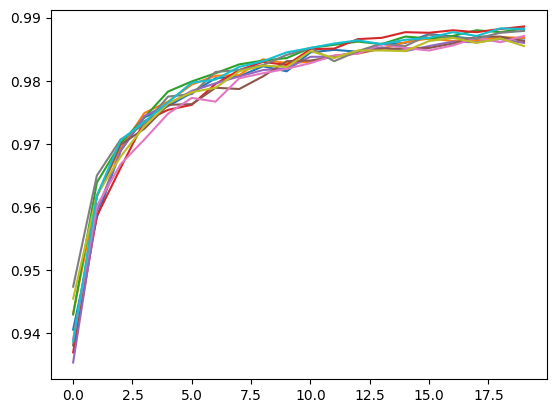

In [20]:
accuracies = []
for i in range(10):
    model_accuracies = []
    for epoch in range(n_epochs):
        network = Net.Net(NUM_CLASSES)
        state_dict = torch.load(f'results2/normal{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_normal, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)


for i in range(10):
    plt.plot(np.arange(n_epochs), accuracies[i])

In [21]:
accuracies = []
for i in range(10):
    model_accuracies = []
    for epoch in range(n_epochs):
        network = Net.Net(NUM_CLASSES_REDUCED)
        state_dict = torch.load(f'results2/reduced{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_reduced, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)


Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Accuracy: 1.0 [1.000 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Accuracy: 1.0 [1.000 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2115/2115 (100%)

Accuracy: 1.0 [1.000 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2111/2115 (100%)

Accuracy: 0.9981087470449173 [0.996 - 1.0]

Test set: Avg. loss: 0.0000, Accur

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/211

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0000, Accuracy: 2113/211

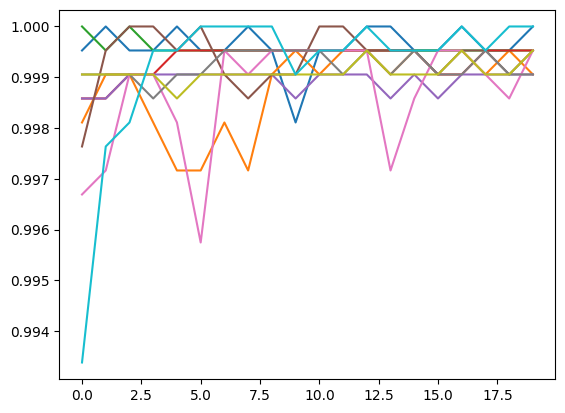

In [22]:
for i in range(10):
    plt.plot(np.arange(n_epochs), accuracies[i])

In [17]:
accuracies = []
for i in range(10):
    model_accuracies = []
    for epoch in range(n_epochs):
        print(f'model {i}, epoch {epoch}')
        network = Net.Net(NUM_CLASSES_REDUCED)
        state_dict = torch.load(f'results2/reduced_ratio{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_reduced, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)

model 0, epoch 0

Test set: Avg. loss: 0.0012, Accuracy: 1135/2115 (54%)

Accuracy: 0.5366430260047281 [0.516 - 0.558]
model 0, epoch 1

Test set: Avg. loss: 0.0010, Accuracy: 986/2115 (47%)

Accuracy: 0.466193853427896 [0.445 - 0.486]
model 0, epoch 2

Test set: Avg. loss: 0.0010, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 0, epoch 3

Test set: Avg. loss: 0.0011, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 0, epoch 4

Test set: Avg. loss: 0.0013, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 0, epoch 5

Test set: Avg. loss: 0.0013, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 0, epoch 6

Test set: Avg. loss: 0.0011, Accuracy: 991/2115 (47%)

Accuracy: 0.4685579196217494 [0.447 - 0.489]
model 0, epoch 7

Test set: Avg. loss: 0.0009, Accuracy: 1255/2115 (59%)

Accuracy: 0.5933806146572104 [0.572 - 0.614]
model 0, epoch 8

Test set: Avg. loss: 0.0006, Accu

Accuracy: 0.7035460992907802 [0.684 - 0.722]
model 3, epoch 10

Test set: Avg. loss: 0.0006, Accuracy: 1780/2115 (84%)

Accuracy: 0.8416075650118203 [0.826 - 0.857]
model 3, epoch 11

Test set: Avg. loss: 0.0005, Accuracy: 1855/2115 (88%)

Accuracy: 0.8770685579196218 [0.863 - 0.891]
model 3, epoch 12

Test set: Avg. loss: 0.0005, Accuracy: 1859/2115 (88%)

Accuracy: 0.8789598108747045 [0.865 - 0.893]
model 3, epoch 13

Test set: Avg. loss: 0.0004, Accuracy: 1936/2115 (92%)

Accuracy: 0.9153664302600473 [0.903 - 0.927]
model 3, epoch 14

Test set: Avg. loss: 0.0005, Accuracy: 1925/2115 (91%)

Accuracy: 0.9101654846335697 [0.897 - 0.922]
model 3, epoch 15

Test set: Avg. loss: 0.0003, Accuracy: 1977/2115 (93%)

Accuracy: 0.9347517730496454 [0.924 - 0.946]
model 3, epoch 16

Test set: Avg. loss: 0.0003, Accuracy: 1974/2115 (93%)

Accuracy: 0.9333333333333333 [0.922 - 0.944]
model 3, epoch 17

Test set: Avg. loss: 0.0003, Accuracy: 1994/2115 (94%)

Accuracy: 0.9427895981087471 [0.933 - 0.

Accuracy: 0.49976359338061466 [0.478 - 0.519]
model 6, epoch 19

Test set: Avg. loss: 0.0014, Accuracy: 995/2115 (47%)

Accuracy: 0.47044917257683216 [0.449 - 0.49]
model 7, epoch 0

Test set: Avg. loss: 0.0128, Accuracy: 1135/2115 (54%)

Accuracy: 0.5366430260047281 [0.516 - 0.558]
model 7, epoch 1

Test set: Avg. loss: 0.0015, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 7, epoch 2

Test set: Avg. loss: 0.0019, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 7, epoch 3

Test set: Avg. loss: 0.0023, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 7, epoch 4

Test set: Avg. loss: 0.0025, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 7, epoch 5

Test set: Avg. loss: 0.0025, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
model 7, epoch 6

Test set: Avg. loss: 0.0026, Accuracy: 980/2115 (46%)

Accuracy: 0.46335697399527187 [0.442 - 0.484]
mo

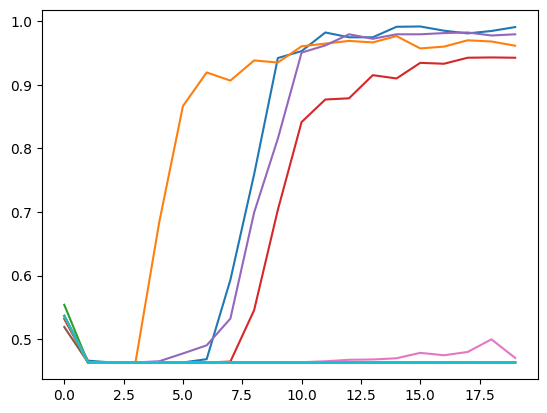

In [18]:
for i in range(10):
    plt.plot(np.arange(n_epochs), accuracies[i])